1.  <a href="#intro">Dataset Description</a>
2.  <a href="#asses">Data Assessing</a>
    - <a href="#emp">Employee.csv</a>
    - <a href="#edu">EducationLevel.csv</a>
    - <a href="#perform">PerformanceRating.csv</a>
    - <a href="#satis">SatisfiedLevel.csv</a>
    - <a href="#rating">RatingLevel.csv</a>
3.  <a href="#clean">Data Cleaning</a>
    - <a href="#c_emp">Employee.csv</a>
    - <a href="#c_edu">EducationLevel.csv</a>
    - <a href="#c_perform">PerformanceRating.csv</a>
    - <a href="#c_satis">SatisfiedLevel.csv</a>
    - <a href="#c_rating">RatingLevel.csv</a>
4. - <a href="#db">Transfering the Cleaned Files to MSSQL</a>
    - <a href="#create">Creating ***HR*** Database</a>
    - <a href="#transfer">Transfering The Files to The Created Database</a>
5. <a href="#extract">Extracting Questions</a>

    

<a id='intro'></a>
### Dataset Description:

### Dataset Introduction
This dataset is designed to provide comprehensive insights into employee performance and satisfaction within the organization. It consists of five interrelated tables, each serving a specific purpose in analyzing various aspects of employee experience and performance metrics.

#### 1. Employee Table ( _Employee.csv_):

This foundational table contains detailed information about each employee, including personal attributes such as name, gender, and salary, as well as professional details like position and educational level. This information is critical for understanding the demographic and professional context of the workforce.

#### 2. Educational Level Table (_EducationLevel.csv_): 
This table categorizes employee educational backgrounds into five distinct levels, ranging from "No Formal Qualifications" to "Doctorate." It serves as a reference for interpreting the education level recorded in the Employee table, facilitating analysis of how educational attainment correlates with performance and satisfaction.

#### 3. Performance Rating Table (_PerformanceRating.csv_): 
This table captures performance evaluations across several dimensions, including Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, Work-Life Balance, Self Rating, and Manager Rating. Each of these metrics is rated on a scale of 1 to 5, enabling a qualitative  assessment of employee performance and satisfaction.

#### 4. Satisfied Level Table (_SatisfiedLevel.csv_): 
This table categorizes employee satisfaction into five distinct levels, ranging from "Very Dissatisfied" to "Very Satisfied." It serves as a reference for interpreting the satisfaction ratings recorded in the Performance Rating table.

#### 5. Rating Table (_RatingLevel.csv_): 
Similar to the Satisfied Level Table, this table provides definitions for performance ratings, ranging from "Unacceptable" to "Above and Beyond." This allows for a standardized assessment of employee performance based on managerial evaluations.

#### ***Integration:***
By linking the Performance Rating table with the Satisfied Level and Rating tables, this dataset enables a nuanced analysis of how employee perceptions of their work environment and self-assessments align with managerial evaluations.

##### _Overall, this dataset is a valuable resource for understanding employee dynamics, assessing satisfaction levels, and identifying areas for improvement within the organization. Through careful analysis, it can inform strategies aimed at enhancing employee engagement, productivity, and overall workplace satisfaction._

In [325]:
# Importing Liberaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from sqlalchemy import create_engine

<a id='asses'></a>
## Data Assessing:
### _General Properties:_

<a id='emp'></a>
#### ***1. Employee Table:***

In [328]:
# Load the Employee Dataset:
df_emp= pd.read_csv("HR/Employee.csv")
df_emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [329]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [330]:
print('The table has a shape of:',df_emp.shape)

The table has a shape of: (1470, 23)


In [331]:
if df_emp.isna().sum().sum()== 0:
    print ('No NULL values in this table')
else:
    print('Total number of Null Values is: ',df_emp.isna().sum().sum())

No NULL values in this table


In [332]:
if df_emp.duplicated().sum()== 0:
    print ('No DUPLICATED values in this table')
else:
    print('Total number of Duplicated Values is: ',df_emp.duplicated().sum())

No DUPLICATED values in this table


In [333]:
print('The number of UNIQUE values in this table:\n\n',df_emp.nunique())

The number of UNIQUE values in this table:

 EmployeeID                 1470
FirstName                  1334
LastName                   1441
Gender                        4
Age                          34
BusinessTravel                3
Department                    3
DistanceFromHome (KM)        45
State                         3
Ethnicity                     7
Education                     5
EducationField                9
JobRole                      13
MaritalStatus                 3
Salary                     1455
StockOptionLevel              4
OverTime                      2
HireDate                   1192
Attrition                     2
YearsAtCompany               11
YearsInMostRecentRole        11
YearsSinceLastPromotion      11
YearsWithCurrManager         11
dtype: int64


In [334]:
print('"Gender" Categories:\n',df_emp.Gender.unique())
print('\n"BusinessTravel" Categories:\n',df_emp.BusinessTravel.unique())
print('\n"Department" Categories:\n',df_emp.Department.unique())
print('\n"State" Categories:\n',df_emp.State.unique())
print('\n"Ethnicity" Categories:\n',df_emp.Ethnicity.unique())
print('\n"Education" Categories:\n',sorted(df_emp.Education.unique()))
print('\n"EducationField" Categories:\n',df_emp.EducationField.unique())
print('\n"JobRole" Categories:\n',df_emp.JobRole.unique())
print('\n"MaritalStatus" Categories:\n',df_emp.MaritalStatus.unique())
print('\n"StockOptionLevel" Categories:\n',sorted(df_emp.StockOptionLevel.unique()))
print('\n"OverTime" Categories:\n',df_emp.OverTime.unique())
print('\n"Attrition" Categories:\n',df_emp.Attrition.unique())

"Gender" Categories:
 ['Female' 'Male' 'Non-Binary' 'Prefer Not To Say']

"BusinessTravel" Categories:
 ['Some Travel' 'No Travel ' 'Frequent Traveller']

"Department" Categories:
 ['Sales' 'Human Resources' 'Technology']

"State" Categories:
 ['IL' 'CA' 'NY']

"Ethnicity" Categories:
 ['White' 'Asian or Asian American' 'Mixed or multiple ethnic groups'
 'Black or African American' 'Native Hawaiian ' 'Other '
 'American Indian or Alaska Native']

"Education" Categories:
 [1, 2, 3, 4, 5]

"EducationField" Categories:
 ['Marketing' 'Marketing ' 'Computer Science' 'Technical Degree'
 'Information Systems' 'Other' 'Economics' 'Human Resources'
 'Business Studies']

"JobRole" Categories:
 ['Sales Executive' 'HR Business Partner' 'Engineering Manager' 'Recruiter'
 'Data Scientist' 'Machine Learning Engineer' 'Manager'
 'Software Engineer' 'Senior Software Engineer' 'Sales Representative'
 'Analytics Manager' 'HR Executive' 'HR Manager']

"MaritalStatus" Categories:
 ['Divorced' 'Single' 'Mar

In [335]:
print(f'Employee Ages are ranging from {df_emp.Age.min()} to {df_emp.Age.max()} Years')

Employee Ages are ranging from 18 to 51 Years


In [336]:
print('Home-Work Distance is ranging from {} to {} KM'.format(df_emp['DistanceFromHome (KM)'].min(),df_emp['DistanceFromHome (KM)'].max()))

Home-Work Distance is ranging from 1 to 45 KM


In [337]:
print(f'Salary is in the range of {df_emp.Salary.min()} to {df_emp.Salary.max()} USD/Year')

Salary is in the range of 20387 to 547204 USD/Year


In [338]:
print(f'The recorded Employee Hiring dates are starting from {df_emp.HireDate.min()} to {df_emp.HireDate.max()}')

The recorded Employee Hiring dates are starting from 2012-01-03 to 2022-12-31


In [339]:
if df_emp.YearsAtCompany.min()== 0:
    print(f'The Working Period of each employee is ranging from less than a year to {df_emp.YearsAtCompany.max()} Years')
else:
    print(f'The Working Period of each employee is ranging from {df_emp.YearsAtCompany.min()} to {df_emp.YearsAtCompany.max()} Years')

The Working Period of each employee is ranging from less than a year to 10 Years


In [340]:
if df_emp.YearsInMostRecentRole.min()== 0:
    print(f'The Time Spent in the current position for each employee is ranging from less than a year to {df_emp.YearsInMostRecentRole.max()} Years')
else:
    print(f'The Time Spent in the current position for each employee is ranging from {df_emp.YearsInMostRecentRole.min()} to {df_emp.YearsInMostRecentRole.max()} Years')

The Time Spent in the current position for each employee is ranging from less than a year to 10 Years


In [341]:
if df_emp.YearsSinceLastPromotion.min()== 0:
    print(f'The Promotion Gap for each employee is ranging from less than a year to {df_emp.YearsSinceLastPromotion.max()} Years')
else:
    print(f'The Promotion Gap for each employee is ranging from {df_emp.YearsSinceLastPromotion.min()} to {df_emp.YearsSinceLastPromotion.max()} Years')

The Promotion Gap for each employee is ranging from less than a year to 10 Years


In [342]:
if df_emp.YearsWithCurrManager.min()== 0:
    print(f'The Working Period of each employee under the current manager is ranging from less than a year to {df_emp.YearsWithCurrManager.max()} Years')
else:
    print(f'The Working Period of each employee under the current manager is ranging from {df_emp.YearsWithCurrManager.min()} to {df_emp.YearsWithCurrManager.max()} Years')

The Working Period of each employee under the current manager is ranging from less than a year to 10 Years


In [343]:
# Checking if the Job Roles are correctely distributed across Departments:
job_role=df_emp.groupby(['Department','JobRole']).EmployeeID.nunique().reset_index().rename(columns={'EmployeeID':'# Employees'}).\
sort_values(['Department','JobRole'],ascending=False)
job_role.style.hide()

Department,JobRole,# Employees
Technology,Software Engineer,294
Technology,Senior Software Engineer,132
Technology,Sales Executive,1
Technology,Machine Learning Engineer,146
Technology,Engineering Manager,75
Technology,Data Scientist,261
Technology,Analytics Manager,52
Sales,Sales Representative,83
Sales,Sales Executive,326
Sales,Manager,37


In [344]:
df_emp.query('Department == "Technology"').query('JobRole== "Sales Executive"').iloc[:,6:]

,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
1187,Technology,15,CA,White,4,Other,Sales Executive,Single,319619,0,Yes,2021-01-26,No,1,1,1,0


In [345]:
# Employee Table Statistical Description:
summary_stat= df_emp.iloc[:,[4,7,14,19,20,21,22]].describe().astype('int64').reset_index().\
                rename(columns={'index':'Stat','DistanceFromHome (KM)': 'Comute_Distance',
                                 'YearsAtCompany':'Tenure','YearsInMostRecentRole': 'Role_Tenure',
                                  'YearsSinceLastPromotion': 'Promotion_Gap',
                                   'YearsWithCurrManager':'Curr_Mgr_Tenure'})

summary_stat

,Stat,Age,Comute_Distance,Salary,Tenure,Role_Tenure,Promotion_Gap,Curr_Mgr_Tenure
0,count,1470,1470,1470,1470,1470,1470,1470
1,mean,28,22,112956,4,2,3,2
2,std,7,12,103342,3,2,2,2
3,min,18,1,20387,0,0,0,0
4,25%,23,12,43580,2,0,1,0
5,50%,26,22,71199,4,1,3,1
6,75%,34,33,142055,7,4,6,4
7,max,51,45,547204,10,10,10,10


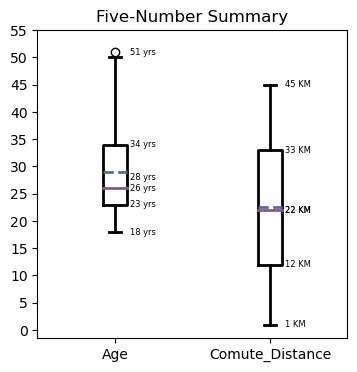

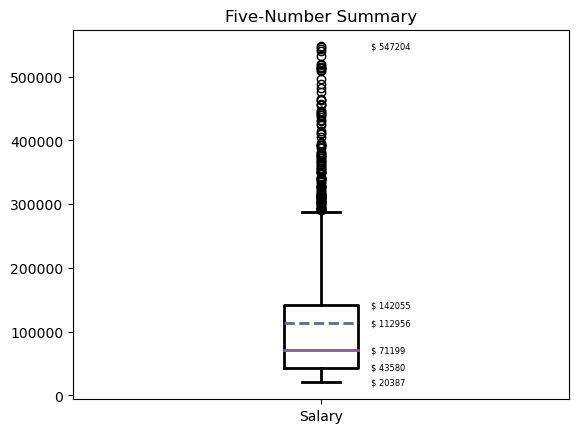

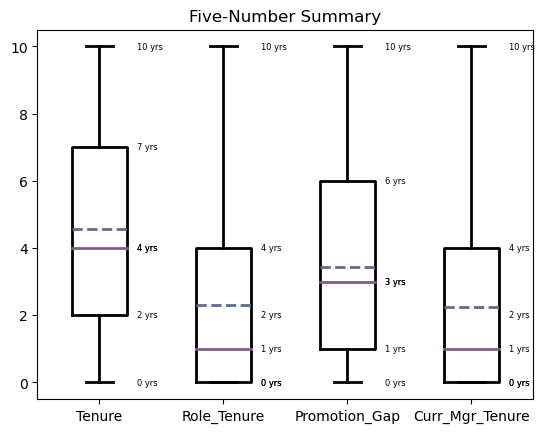

In [346]:
# Visualizing those 7 Columns to check for outliers and any possible inconsistency:
plt.subplots(figsize = (4,4))

# Age & Home-Work Distance (their values are close to each other)
plt.boxplot(df_emp.iloc[:,[4,7]],showmeans = True, meanline  = True,showcaps = True,medianprops={ "color" : "#805d87","linewidth": 2},
            boxprops={"color":"black","linewidth": 2},whiskerprops={"color": "black", "linewidth": 2},
            capprops={"color": "black", "linewidth": 2},meanprops = {"color": "#5e6b91","linewidth": 2 })
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],1]):
  plt.text(1.1,v,f'{v:.0f} yrs', ha='left', va='center',fontsize=6)
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],2]):
  plt.text(2.1,v,f'{v:.0f} KM', ha='left', va='center',fontsize=6)
plt.title('Five-Number Summary', fontsize = 12)
plt.xticks([1,2],['Age','Comute_Distance'], fontsize = 10)
plt.yticks(np.arange(0,60,5),fontsize = 10)
plt.show();

# Salary:
plt.boxplot(df_emp.Salary,showmeans = True, meanline  = True,showcaps = True,medianprops={ "color" : "#805d87","linewidth": 2},
            boxprops={"color":"black","linewidth": 2},whiskerprops={"color": "black", "linewidth": 2},
            capprops={"color": "black", "linewidth": 2},meanprops = {"color": "#5e6b91","linewidth": 2 })
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],3]):
  plt.text(1.1,v,f'$ {v:.0f}', ha='left', va='center',fontsize=6)  
plt.title('Five-Number Summary', fontsize = 12)
plt.xticks([1],['Salary'], fontsize = 10)
plt.yticks(fontsize = 10)
plt.show();

# YearsAtCompany, YearsInMostRecentRole, YearsSinceLastPromotion, YearsWithCurrManager:
plt.boxplot(df_emp.iloc[:,[19,20,21,22]],showmeans = True, meanline  = True,showcaps = True,medianprops={ "color" : "#805d87","linewidth": 2},
            boxprops={"color":"black","linewidth": 2},whiskerprops={"color": "black", "linewidth": 2},
            capprops={"color": "black", "linewidth": 2},meanprops = {"color": "#5e6b91","linewidth": 2 })
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],4]):
  plt.text(1.3,v,f'{v:.0f} yrs', ha='left', va='center',fontsize=6) 
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],5]):
  plt.text(2.3,v,f'{v:.0f} yrs', ha='left', va='center',fontsize=6) 
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],6]):
  plt.text(3.3,v,f'{v:.0f} yrs', ha='left', va='center',fontsize=6)
for i, v in enumerate(summary_stat.iloc[[1,3,4,5,6,7],7]):
  plt.text(4.3,v,f'{v:.0f} yrs', ha='left', va='center',fontsize=6) 
plt.title('Five-Number Summary', fontsize = 12)
plt.xticks([1,2,3,4],['Tenure','Role_Tenure','Promotion_Gap','Curr_Mgr_Tenure'], fontsize = 10)
plt.yticks(fontsize = 10)
plt.show();

In [347]:
# Investigating the Salary Column:
# Calculating 1st & 3rd Quartiles:
q1= df_emp.Salary.quantile(0.25)
q3= df_emp.Salary.quantile(0.75)

# Calculating IQR:
IQR = q3 - q1

# Calculating Lower & higher Bounds
lower_bound = q1-1.5*IQR
higher_bound = q3+1.5*IQR

# Identifying the Outliers:
outliers = df_emp[(df_emp.Salary< lower_bound) |(df_emp.Salary> higher_bound )]
outliers.sample(5)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
900,82B4-8569,Adrian,Swatman,Male,44,Some Travel,Sales,44,CA,Mixed or multiple ethnic groups,...,Divorced,313891,1,No,2018-12-23,No,4,4,4,3
648,F58A-302D,Travers,Outhwaite,Male,26,Some Travel,Sales,17,IL,Black or African American,...,Divorced,290774,1,No,2016-11-05,No,6,5,5,3
63,9DFE-1FD5,Angel,Hazeup,Male,42,Some Travel,Human Resources,4,IL,Black or African American,...,Married,463051,1,No,2012-03-01,No,10,0,10,7
1153,8640-414A,Rivkah,Siderfin,Female,29,Some Travel,Technology,32,CA,White,...,Married,390142,0,No,2020-10-27,No,2,1,2,2
1138,06DE-E772,Zechariah,Sturridge,Male,34,Frequent Traveller,Sales,45,NY,White,...,Married,341971,0,No,2020-09-02,Yes,1,0,0,0


In [348]:
print(f'The Lowest Outlier Salary is {outliers.Salary.min()} USD/Year')
print(f'\nThe Highest Outlier Salary is {outliers.Salary.max()} USD/Year')
print('\nThe Distribution of Outliers among Departments is:\n{} '.format(outliers.groupby('Department').EmployeeID.count()))  # Makes sense most of them in Tech
print('\nThe Distribution of Outliers among Job Roles is:\n{}'.format(outliers.groupby('JobRole').EmployeeID.count()))  #These outliers are mostly distributed among Managers & Seniors

The Lowest Outlier Salary is 290774 USD/Year

The Highest Outlier Salary is 547204 USD/Year

The Distribution of Outliers among Departments is:
Department
Human Resources     8
Sales              32
Technology         84
Name: EmployeeID, dtype: int64 

The Distribution of Outliers among Job Roles is:
JobRole
Analytics Manager            32
Data Scientist                2
Engineering Manager          39
HR Business Partner           4
HR Manager                    4
Machine Learning Engineer     3
Manager                      24
Sales Executive               9
Senior Software Engineer      5
Software Engineer             2
Name: EmployeeID, dtype: int64


<a id='edu'></a>
#### ***2. Educational Level Table:***

In [350]:
df_edu= pd.read_csv("HR/EducationLevel.csv")
df_edu.head()

,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


In [351]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EducationLevelID  5 non-null      int64 
 1   EducationLevel    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [352]:
print('The table has a shape of:',df_edu.shape)

The table has a shape of: (5, 2)


In [353]:
if df_edu.isna().sum().sum()== 0:
    print ('No NULL values in this table')
else:
    print('Total number of Null Values is: ',df_edu.isna().sum().sum())


No NULL values in this table


In [354]:
if df_edu.duplicated().sum()== 0:
    print ('No DUPLICATED values in this table')
else:
    print('Total number of Duplicated Values is: ',df.duplicated().sum())

No DUPLICATED values in this table


In [355]:
print('The number of UNIQUE values in this table:\n\n',df_edu.nunique())

The number of UNIQUE values in this table:

 EducationLevelID    5
EducationLevel      5
dtype: int64


In [356]:
print('"EducationLevelID" Categories:\n',df_edu.EducationLevelID.unique())
print('\n"EducationLevel" Categories:\n',df_edu.EducationLevel.unique())

"EducationLevelID" Categories:
 [1 2 3 4 5]

"EducationLevel" Categories:
 ['No Formal Qualifications' 'High School ' 'Bachelors ' 'Masters '
 'Doctorate']


<a id='perform'></a>
#### ***3. Performance Rating Table:***

In [358]:
df_performance= pd.read_csv("HR/PerformanceRating.csv")
df_performance.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


In [359]:
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [360]:
print('The table has a shape of:',df_performance.shape)

The table has a shape of: (6709, 11)


In [361]:
if df_performance.isna().sum().sum()== 0:
    print ('No NULL values in this table')
else:
    print('Total number of Null Values is: ',df_performance.isna().sum().sum())


No NULL values in this table


In [362]:
if df_performance.duplicated().sum()== 0:
    print ('No DUPLICATED values in this table')
else:
    print('Total number of Duplicated Values is: ',df_performance.duplicated().sum())


No DUPLICATED values in this table


In [363]:
print('The number of UNIQUE values in this table:\n\n',df_performance.nunique())

The number of UNIQUE values in this table:

 PerformanceID                      6709
EmployeeID                         1280
ReviewDate                         2771
EnvironmentSatisfaction               5
JobSatisfaction                       5
RelationshipSatisfaction              5
TrainingOpportunitiesWithinYear       3
TrainingOpportunitiesTaken            4
WorkLifeBalance                       5
SelfRating                            3
ManagerRating                         4
dtype: int64


In [364]:
df_performance.ReviewDate.min()

'1/1/2014'

In [365]:
df_performance.ReviewDate.max()

'9/9/2019'

In [366]:
print('"EnvironmentSatisfaction" Categories:             ',sorted(df_performance.EnvironmentSatisfaction.unique()))
print('\n"JobSatisfaction" Categories:                     ',sorted(df_performance.JobSatisfaction.unique()))
print('\n"RelationshipSatisfaction" Categories:            ',sorted(df_performance.RelationshipSatisfaction.unique()))
print('\n"TrainingOpportunitiesWithinYear" Categories:     ',sorted(df_performance.TrainingOpportunitiesWithinYear.unique()))
print('\n"TrainingOpportunitiesTaken" Categories:          ',sorted(df_performance.TrainingOpportunitiesTaken.unique()))
print('\n"WorkLifeBalance" Categories:                     ',sorted(df_performance.WorkLifeBalance.unique()))
print('\n"SelfRating" Categories:                          ',sorted(df_performance.SelfRating.unique()))
print('\n"ManagerRating" Categories:                       ',sorted(df_performance.ManagerRating.unique()))

"EnvironmentSatisfaction" Categories:              [1, 2, 3, 4, 5]

"JobSatisfaction" Categories:                      [1, 2, 3, 4, 5]

"RelationshipSatisfaction" Categories:             [1, 2, 3, 4, 5]

"TrainingOpportunitiesWithinYear" Categories:      [1, 2, 3]

"TrainingOpportunitiesTaken" Categories:           [0, 1, 2, 3]

"WorkLifeBalance" Categories:                      [1, 2, 3, 4, 5]

"SelfRating" Categories:                           [3, 4, 5]

"ManagerRating" Categories:                        [2, 3, 4, 5]


In [367]:
# Performance Rating Table Statistical Description:
Performance_stat= df_performance.describe().astype('int64').rename(columns={'EnvironmentSatisfaction':'Environ_Satis', 'JobSatisfaction':'Job_Satis',
                                                         'RelationshipSatisfaction':'R_Satisf','TrainingOpportunitiesWithinYear': 'Train_OPP',
                                                         'TrainingOpportunitiesTaken':'Train_OPP_Taken', 'WorkLifeBalance':'W_L_Bal',
                                                         'SelfRating':'Self_Rating','ManagerRating':'Mgr_Rating'})
Performance_stat

,Environ_Satis,Job_Satis,R_Satisf,Train_OPP,Train_OPP_Taken,W_L_Bal,Self_Rating,Mgr_Rating
count,6709,6709,6709,6709,6709,6709,6709,6709
mean,3,3,3,2,1,3,3,3
std,0,1,1,0,0,1,0,0
min,1,1,1,1,0,1,3,2
25%,3,2,2,1,0,2,3,3
50%,4,3,3,2,1,3,4,3
75%,5,4,4,3,2,4,5,4
max,5,5,5,3,3,5,5,5


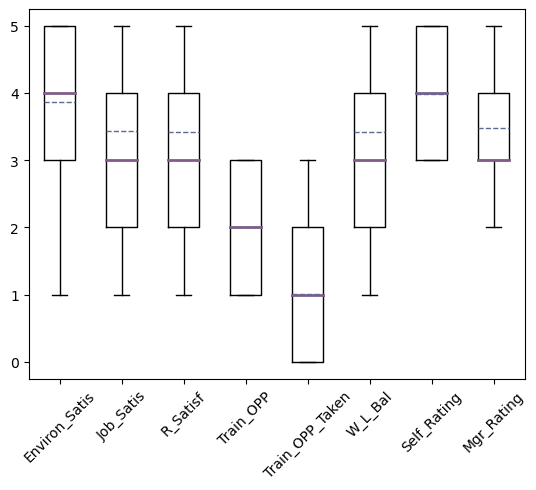

In [368]:
# Visulaizing the 5 Number summary of the Performance Rating Table:
labels= Performance_stat.columns.tolist()
plt.boxplot(df_performance.iloc[:,3:],showmeans = True, meanline  = True,showcaps = True,medianprops={ "color" : "#805d87","linewidth": 2},
            boxprops={"color":"black","linewidth": 1},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#5e6b91","linewidth": 1 })
plt.xticks([1,2,3,4,5,6,7,8],labels, rotation=45, fontsize=10);

<a id='satis'></a>
#### ***4. Satisfied Level Table:***

In [370]:
df_satisfy= pd.read_csv("HR/SatisfiedLevel.csv")
df_satisfy.head()

,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


In [371]:
df_satisfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SatisfactionID     5 non-null      int64 
 1   SatisfactionLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [372]:
print('The table has a shape of:',df_satisfy.shape)

The table has a shape of: (5, 2)


In [373]:
if df_satisfy.isna().sum().sum()== 0:
    print ('No NULL values in this table')
else:
    print('Total number of Null Values is: ',df_satisfy.isna().sum().sum())

No NULL values in this table


In [374]:
if df_satisfy.duplicated().sum()== 0:
    print ('No DUPLICATED values in this table')
else:
    print('Total number of Duplicated Values is: ',df_satisfy.duplicated().sum())

No DUPLICATED values in this table


In [375]:
print('The number of UNIQUE values in this table:\n\n',df_satisfy.nunique())

The number of UNIQUE values in this table:

 SatisfactionID       5
SatisfactionLevel    5
dtype: int64


In [376]:
print('"SatisfactionID" Categories:\n',df_satisfy.SatisfactionID.unique())
print('\n"SatisfactionLevel" Categories:\n',df_satisfy.SatisfactionLevel.unique())

"SatisfactionID" Categories:
 [1 2 3 4 5]

"SatisfactionLevel" Categories:
 ['Very Dissatisfied' 'Dissatisfied' 'Neutral' 'Satisfied '
 'Very Satisfied']


<a id='rating'></a>
#### ***5. Rating Level Table:***

In [378]:
df_rating= pd.read_csv("HR/RatingLevel.csv")
df_rating.head()

,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


In [379]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   RatingID     5 non-null      int64 
 1   RatingLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [380]:
print('The table has a shape of:',df_rating.shape)

The table has a shape of: (5, 2)


In [381]:
if df_rating.isna().sum().sum()== 0:
    print ('No NULL values in this table')
else:
    print('Total number of Null Values is: ',df_rating.isna().sum().sum())

No NULL values in this table


In [382]:
if df_rating.duplicated().sum()== 0:
    print ('No DUPLICATED values in this table')
else:
    print('Total number of Duplicated Values is: ',df_rating.duplicated().sum())

No DUPLICATED values in this table


In [383]:
print('The number of UNIQUE values in this table:\n\n',df_rating.nunique())

The number of UNIQUE values in this table:

 RatingID       5
RatingLevel    5
dtype: int64


In [384]:
print('"RatingID" Categories:\n',df_rating.RatingID.unique())
print('\n"RatingLevel" Categories:\n',df_rating.RatingLevel.unique())

"RatingID" Categories:
 [1 2 3 4 5]

"RatingLevel" Categories:
 ['Unacceptable' 'Needs Improvement' 'Meets Expectation'
 'Exceeds Expectation ' 'Above and Beyond']


<a id='clean'></a>
## Data Cleaning:

<a id='c_emp'></a>
#### ***1. Employee Table:***

In [387]:
df_emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


##### _1. Renaming Columns to be handled easily as follows:_
- EmployeeID to ***Emp_ID***
- FirstName to ***F_Name***
- LastName to ***L_Name***
- BusinessTravel to ***Business_Travel***
- DistanceFromHome (KM) to ***Comute_Distance***
- Ethnicity to ***Race***
- Education to ***Edu_level_ID***
- EducationField to ***Major***
- JobRole to ***Position***
- MaritalStatus to ***Marital_Status***
- StockOptionLevel to ***Equity_Grant***
- OverTime to ***Overtime***
- HireDate to ***Hire_Date***
- Attrition to ***Turnover***
- YearsAtCompany to  ***Tenure***
- YearsInMostRecentRole to ***Role_Tenure***
- YearsSinceLastPromotion to ***Promotion_Gap***
- YearsWithCurrManager to ***Manager_Tenure***

In [389]:
# Renaming the dataset columns:
df_emp = df_emp.rename(columns = {"EmployeeID":"Emp_ID", "FirstName":"F_Name", 'LastName':"L_Name","BusinessTravel":"Business_Travel",
                                  "DistanceFromHome (KM)":"Comute_Distance","Ethnicity":"Race", "Education":"Edu_level_ID", "EducationField":"Major",
                                  "JobRole":"Position", "MaritalStatus":"Marital_Status", "StockOptionLevel":"Equity_Grant","OverTime":"Overtime", 
                                  "HireDate":"Hire_Date","Attrition":"Turnover", "YearsAtCompany":"Tenure", "YearsInMostRecentRole": "Role_Tenure",
                                  "YearsSinceLastPromotion":"Promotion_Gap", "YearsWithCurrManager":"Manager_Tenure"})
df_emp.head(1)

,Emp_ID,F_Name,L_Name,Gender,Age,Business_Travel,Department,Comute_Distance,State,Race,...,Marital_Status,Salary,Equity_Grant,Overtime,Hire_Date,Turnover,Tenure,Role_Tenure,Promotion_Gap,Manager_Tenure
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7


#### _2. Changing the Hire date to Date Data Type:_

In [391]:
df_emp['Hire_Date'] = pd.to_datetime(df_emp['Hire_Date']).dt.date
df_emp.Hire_Date.head()

0    2012-01-03
1    2012-01-04
2    2012-01-04
3    2012-01-05
4    2012-01-05
Name: Hire_Date, dtype: object

#### _3. Handling the extra space & incorrect spelling in the following:_
- ***Business_Travel*** column: Editing _"No Travel "_, _"Frequent Traveller"_ values.
- ***Race*** column: Editing _'Other '_ value.
- ***Major*** column: Editing _'Marketing '_ value.


In [393]:
# 1- Business_Travel Column:
df_emp.Business_Travel= np.where(df_emp.Business_Travel== "No Travel ","No Travel",df_emp.Business_Travel)
df_emp.Business_Travel= np.where(df_emp.Business_Travel== "Frequent Traveller","Frequent Traveler",df_emp.Business_Travel)
print('The updated "Business_Travel" Categories are as follows:\n\n   ',df_emp.Business_Travel.unique())

The updated "Business_Travel" Categories are as follows:

    ['Some Travel' 'No Travel' 'Frequent Traveler']


In [394]:
# 2- Race Column:
df_emp.Race= np.where(df_emp.Race== 'Other ','Other',df_emp.Race)
print('The updated "Race" Categories are as follows:\n\n',df_emp.Race.unique())

The updated "Race" Categories are as follows:

 ['White' 'Asian or Asian American' 'Mixed or multiple ethnic groups'
 'Black or African American' 'Native Hawaiian ' 'Other'
 'American Indian or Alaska Native']


In [395]:
# 3- Major Column:
df_emp.Major= np.where(df_emp.Major== 'Marketing ','Marketing',df_emp.Major)
print('The updated "Major" Categories are as follows:\n\n',df_emp.Major.unique())

The updated "Major" Categories are as follows:

 ['Marketing' 'Computer Science' 'Technical Degree' 'Information Systems'
 'Other' 'Economics' 'Human Resources' 'Business Studies']


#### _4. Correcting the classification of “Sales Executive” Department:_
Replacing Technology with Sales in the Department column

In [397]:
df_emp['Department']= np.where( df_emp['Position']== 'Sales Executive','Sales',df_emp['Department'])
position=df_emp.groupby(['Department','Position']).Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values(['Department','# Employees'],ascending=False)
position.style.hide()

Department,Position,# Employees
Technology,Software Engineer,294
Technology,Data Scientist,261
Technology,Machine Learning Engineer,146
Technology,Senior Software Engineer,132
Technology,Engineering Manager,75
Technology,Analytics Manager,52
Sales,Sales Executive,327
Sales,Sales Representative,83
Sales,Manager,37
Human Resources,HR Executive,28


#### _5. Arranging columns:_

In [399]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Emp_ID           1470 non-null   object
 1   F_Name           1470 non-null   object
 2   L_Name           1470 non-null   object
 3   Gender           1470 non-null   object
 4   Age              1470 non-null   int64 
 5   Business_Travel  1470 non-null   object
 6   Department       1470 non-null   object
 7   Comute_Distance  1470 non-null   int64 
 8   State            1470 non-null   object
 9   Race             1470 non-null   object
 10  Edu_level_ID     1470 non-null   int64 
 11  Major            1470 non-null   object
 12  Position         1470 non-null   object
 13  Marital_Status   1470 non-null   object
 14  Salary           1470 non-null   int64 
 15  Equity_Grant     1470 non-null   int64 
 16  Overtime         1470 non-null   object
 17  Hire_Date        1470 non-null   

In [400]:
# relocating the "age_stages" column to be in the 6th column:
df_emp.insert(5,'Race',df_emp.pop('Race'))
df_emp.insert(6,'Marital_Status',df_emp.pop('Marital_Status'))
df_emp.insert(7,'Edu_level_ID',df_emp.pop('Edu_level_ID'))
df_emp.insert(8,'Major',df_emp.pop('Major'))
df_emp.insert(9,'State',df_emp.pop('State'))
df_emp.insert(10,'Comute_Distance',df_emp.pop('Comute_Distance'))
df_emp.insert(11,'Position',df_emp.pop('Position'))
df_emp.insert(12,'Department',df_emp.pop('Department'))
df_emp.insert(13,'Salary',df_emp.pop('Salary'))
df_emp.insert(14,'Hire_Date',df_emp.pop('Hire_Date'))
df_emp.insert(15,'Tenure',df_emp.pop('Tenure'))
df_emp.insert(16,'Role_Tenure',df_emp.pop('Role_Tenure'))
df_emp.insert(17,'Promotion_Gap',df_emp.pop('Promotion_Gap'))
df_emp.insert(18,'Manager_Tenure',df_emp.pop('Manager_Tenure'))
df_emp.insert(19,'Overtime',df_emp.pop('Overtime'))

In [401]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Emp_ID           1470 non-null   object
 1   F_Name           1470 non-null   object
 2   L_Name           1470 non-null   object
 3   Gender           1470 non-null   object
 4   Age              1470 non-null   int64 
 5   Race             1470 non-null   object
 6   Marital_Status   1470 non-null   object
 7   Edu_level_ID     1470 non-null   int64 
 8   Major            1470 non-null   object
 9   State            1470 non-null   object
 10  Comute_Distance  1470 non-null   int64 
 11  Position         1470 non-null   object
 12  Department       1470 non-null   object
 13  Salary           1470 non-null   int64 
 14  Hire_Date        1470 non-null   object
 15  Tenure           1470 non-null   int64 
 16  Role_Tenure      1470 non-null   int64 
 17  Promotion_Gap    1470 non-null   

#### _6. Creating age, Distance, & Salary Groups:_
- The values are categorized according to their Descriptive Statistics
- The salaries are categorized according to their descriptive statistics and their identified outliers
##### ***Age_Stages Categories:***
- **Youth:** 18-25 Years
- **Young_Adult:** 26-34 Years
- **Adult:** 35-44 Years
- **Mature_Adult:** 45-51 Years

##### ***Distance_Level Categories:***
- **Short:** 1-12 KM
- **Moderate:** 13-22 KM
- **Long:** 23-33 KM
- **Very_Long:** 34-45 KM

##### ***Salary_Level Categories:***
- **Low:** 20,387 - 80,000 USD/Year
- **Medium:** More than 80,000 - 142,056 USD/Year
- **High:** More than 142,056 - 200,000 USD/Year
- **Very_ High:** More than 200,000 - 290,773 USD/Year
- **Extra_High:** 290,774 - 547,204 USD/Year


In [403]:
# Creating Age_Stages Column:
df_emp['Age_Stages']= ['Youth' if x <= 25
                      else 'Young_Adult' if 26<= x <= 34
                      else 'Adult' if 35<= x <= 44
                      else 'Mature_Adult' for x in df_emp.Age]

# Relocate the column to be in the 4th row:
df_emp.insert(4,'Age_Stages',df_emp.pop('Age_Stages'))
df_emp.head(1)

,Emp_ID,F_Name,L_Name,Gender,Age_Stages,Age,Race,Marital_Status,Edu_level_ID,Major,...,Salary,Hire_Date,Tenure,Role_Tenure,Promotion_Gap,Manager_Tenure,Overtime,Business_Travel,Equity_Grant,Turnover
0,3012-1A41,Leonelle,Simco,Female,Young_Adult,30,White,Divorced,5,Marketing,...,102059,2012-01-03,10,4,9,7,No,Some Travel,1,No


In [404]:
# Creating Distance_Level Column:
df_emp['Distance_Level']= ['Short' if x <= 12
                      else 'Moderate' if 13<= x <= 22
                      else 'Long' if 23<= x <= 33
                      else 'Very_Long' for x in df_emp.Comute_Distance]

# Relocate the column to be in the 4th row:
df_emp.insert(12,'Distance_Level',df_emp.pop('Distance_Level'))
df_emp.iloc[:,10:].head(1)

,State,Comute_Distance,Distance_Level,Position,Department,Salary,Hire_Date,Tenure,Role_Tenure,Promotion_Gap,Manager_Tenure,Overtime,Business_Travel,Equity_Grant,Turnover
0,IL,27,Long,Sales Executive,Sales,102059,2012-01-03,10,4,9,7,No,Some Travel,1,No


In [405]:
# Creating Salary_Level Column:
df_emp['Salary_Level']= ['Low' if x <= 80000
                      else 'Medium' if 80000< x <= 142056
                      else 'High' if 142056< x <= 200000
                      else 'Very_High' if 200000 < x <=  290773
                      else 'Extra_High' for x in df_emp.Salary]

# Relocate the column to be in the 4th row:
df_emp.insert(16,'Salary_Level',df_emp.pop('Salary_Level'))
df_emp.iloc[:,10:].head(1)

,State,Comute_Distance,Distance_Level,Position,Department,Salary,Salary_Level,Hire_Date,Tenure,Role_Tenure,Promotion_Gap,Manager_Tenure,Overtime,Business_Travel,Equity_Grant,Turnover
0,IL,27,Long,Sales Executive,Sales,102059,Medium,2012-01-03,10,4,9,7,No,Some Travel,1,No


#### 7. Dividing the table into Employee_Information & Work_Profile:

In [407]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Emp_ID           1470 non-null   object
 1   F_Name           1470 non-null   object
 2   L_Name           1470 non-null   object
 3   Gender           1470 non-null   object
 4   Age_Stages       1470 non-null   object
 5   Age              1470 non-null   int64 
 6   Race             1470 non-null   object
 7   Marital_Status   1470 non-null   object
 8   Edu_level_ID     1470 non-null   int64 
 9   Major            1470 non-null   object
 10  State            1470 non-null   object
 11  Comute_Distance  1470 non-null   int64 
 12  Distance_Level   1470 non-null   object
 13  Position         1470 non-null   object
 14  Department       1470 non-null   object
 15  Salary           1470 non-null   int64 
 16  Salary_Level     1470 non-null   object
 17  Hire_Date        1470 non-null   

In [408]:
# Creating E_Personal_Details Table:
Employee_Information= df_emp.iloc[:,0:13]
Employee_Information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Emp_ID           1470 non-null   object
 1   F_Name           1470 non-null   object
 2   L_Name           1470 non-null   object
 3   Gender           1470 non-null   object
 4   Age_Stages       1470 non-null   object
 5   Age              1470 non-null   int64 
 6   Race             1470 non-null   object
 7   Marital_Status   1470 non-null   object
 8   Edu_level_ID     1470 non-null   int64 
 9   Major            1470 non-null   object
 10  State            1470 non-null   object
 11  Comute_Distance  1470 non-null   int64 
 12  Distance_Level   1470 non-null   object
dtypes: int64(3), object(10)
memory usage: 149.4+ KB


In [409]:
# Creating E_Working_Details Table:
Work_Profile= df_emp.iloc[:,[0,13,14,15,16,17,18,19,20,21,22,23,24,25]]
Work_Profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Emp_ID           1470 non-null   object
 1   Position         1470 non-null   object
 2   Department       1470 non-null   object
 3   Salary           1470 non-null   int64 
 4   Salary_Level     1470 non-null   object
 5   Hire_Date        1470 non-null   object
 6   Tenure           1470 non-null   int64 
 7   Role_Tenure      1470 non-null   int64 
 8   Promotion_Gap    1470 non-null   int64 
 9   Manager_Tenure   1470 non-null   int64 
 10  Overtime         1470 non-null   object
 11  Business_Travel  1470 non-null   object
 12  Equity_Grant     1470 non-null   int64 
 13  Turnover         1470 non-null   object
dtypes: int64(6), object(8)
memory usage: 160.9+ KB


<a id='c_edu'></a>
#### ***2. Educational Level Table:***

In [411]:
df_edu.head()

,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


##### _1. Renaming Columns to be handled easily as follows:_
- EducationLevelID to ***Edu_Level_ID***
- EducationLevel to ***Edu_Level***

In [413]:
# Renaming the dataset columns:
df_edu = df_edu.rename(columns = {"EducationLevelID":"Edu_Level_ID", "EducationLevel":"Edu_Level"})
df_edu

,Edu_Level_ID,Edu_Level
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


#### _2. Handling the extra space :_
- ***Edu_Level*** column: Editing _"High School "_, _"Bachelors "_, _"Masters "_ values.

In [415]:
df_edu.Edu_Level= np.where(df_edu.Edu_Level== "High School ","High School",df_edu.Edu_Level)
df_edu.Edu_Level= np.where(df_edu.Edu_Level== "Bachelors ","Bachelors",df_edu.Edu_Level)
df_edu.Edu_Level= np.where(df_edu.Edu_Level== "Masters ","Masters",df_edu.Edu_Level)
print('The updated "Edu_Level" Categories are as follows:\n\n   ',df_edu.Edu_Level.unique())

The updated "Edu_Level" Categories are as follows:

    ['No Formal Qualifications' 'High School' 'Bachelors' 'Masters'
 'Doctorate']


<a id='c_perform'></a>
#### ***3. Performance Rating Table:***

In [417]:
df_performance.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


##### _1. Renaming Columns to be handled easily as follows:_
- PerformanceID  to ***Performance_ID***
- EmployeeID  to ***Emp_ID***
- ReviewDate  to ***Review_Date***
- EnvironmentSatisfaction  to ***Environ_Satis_Level***
- JobSatisfaction  to ***Job_Satis_Level***
- RelationshipSatisfaction  to ***Relationship_Satis_Level***
- TrainingOpportunitiesWithinYear  to ***Train_Opp_Year***
- TrainingOpportunitiesTaken  to ***Train_Opp_Taken***
- WorkLifeBalance  to ***Work_Life_Bal***
- SelfRating  to ***Self_Rating***
- ManagerRating   to ***Mgr_Rating***

In [419]:
df_performance=df_performance.rename(columns= {'PerformanceID':'Performance_ID','EmployeeID':'Emp_ID','ReviewDate':'Review_Date',
                                                'EnvironmentSatisfaction':'Environ_Satis_Level','JobSatisfaction':'Job_Satis_Level',
                                                'RelationshipSatisfaction':'Relationship_Satis_Level','TrainingOpportunitiesWithinYear':'Train_Opp_Year',
                                                'TrainingOpportunitiesTaken':'Train_Opp_Taken', 'WorkLifeBalance':'Work_Life_Bal',
                                                'SelfRating':'Self_Rating', 'ManagerRating':'Mgr_Rating'})
df_performance.head(1)

,Performance_ID,Emp_ID,Review_Date,Environ_Satis_Level,Job_Satis_Level,Relationship_Satis_Level,Train_Opp_Year,Train_Opp_Taken,Work_Life_Bal,Self_Rating,Mgr_Rating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4


#### _2. Changing the Hire date to Date Data Type:_

In [421]:
df_performance['Review_Date'] = pd.to_datetime(df_performance['Review_Date']).dt.date
df_performance['Review_Date'].head()

0    2013-01-02
1    2013-01-03
2    2013-01-03
3    2013-01-04
4    2013-01-04
Name: Review_Date, dtype: object

<a id='c_satis'></a>
#### ***4. Satisfied Level Table:***

In [423]:
df_satisfy.head()

,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


##### _1. Renaming Columns to be handled easily as follows:_
- SatisfactionID  to ***Satisfaction_ID***
- SatisfactionLevel to ***S_Level***

In [425]:
# Renaming the dataset columns:
df_satisfy = df_satisfy.rename(columns = {"SatisfactionID":"Satisfaction_ID", "SatisfactionLevel":"S_Level"})
df_satisfy

,Satisfaction_ID,S_Level
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


#### _2. Handling the extra space :_
- ***S_Level*** column: Editing _"Satisfied "_ value.

In [427]:
df_satisfy.S_Level= np.where(df_satisfy.S_Level== "Satisfied ","Satisfied",df_satisfy.S_Level)
print('The updated "S_Level" Categories are as follows:\n\n   ',df_satisfy.S_Level.unique())

The updated "S_Level" Categories are as follows:

    ['Very Dissatisfied' 'Dissatisfied' 'Neutral' 'Satisfied' 'Very Satisfied']


<a id='c_rating'></a>
#### ***5. Rating Table:***

In [429]:
df_rating.head()

,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


##### _1. Renaming Columns to be handled easily as follows:_
- RatingID  to ***Rating_ID***
- RatingLevel to ***Rating_Level***

In [431]:
# Renaming the dataset columns:
df_rating = df_rating.rename(columns = {"RatingID":"Rating_ID", "RatingLevel":"R_Level"})
df_rating

,Rating_ID,R_Level
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


#### _2. Handling the extra space :_
- ***R_Level*** column: Editing _"'Exceeds Expectation "_ value.

In [433]:
df_rating.R_Level= np.where(df_rating.R_Level== "Exceeds Expectation ","Exceeds Expectation",df_rating.R_Level)
print('The updated "R_Level" Categories are as follows:\n\n   ',df_rating.R_Level.unique())

The updated "R_Level" Categories are as follows:

    ['Unacceptable' 'Needs Improvement' 'Meets Expectation'
 'Exceeds Expectation' 'Above and Beyond']


In [434]:
Employee_Information.head(1)

,Emp_ID,F_Name,L_Name,Gender,Age_Stages,Age,Race,Marital_Status,Edu_level_ID,Major,State,Comute_Distance,Distance_Level
0,3012-1A41,Leonelle,Simco,Female,Young_Adult,30,White,Divorced,5,Marketing,IL,27,Long


<a id='db'></a>
## Transfereing the Cleaned Files to MSSQL:

<a id='create'></a>
#### 1- Creating ***HR*** Database:

In [437]:
# Define the connection parameters
server = 'HEND\SQLEXPRESS'  # Ensure the SQL Server instance name is correct
db_name = 'Human_Resources'  # Name of the new database

# Establish a connection to the SQL Server using Windows Authentication with autocommit enabled
driver = 'ODBC Driver 17 for SQL Server'
connection_string = f'DRIVER={driver};SERVER={server};Trusted_Connection=yes;'

# Note:
# For Connection Parameters with user name & Password activate the following code instead of the above code:
#server = 'HEND\SQLEXPRESS'  # Put your SQL Server name or IP
#db_name = 'Human_Resources'  # Name of the new database
#username = 'your_username'    # SQL Server username
#password = 'your_password'     # SQL Server password
# driver = 'ODBC Driver 17 for SQL Server'
#connection_string = f'DRIVER={driver};SERVER={server};UID={username};PWD={password}'




# Connect with autocommit enabled
connection = pyodbc.connect(connection_string, autocommit=True)

# Create a new cursor
cursor = connection.cursor()

# SQL command to create a new database
create_db_query = f"CREATE DATABASE {db_name}"

try:
    # Execute the SQL command
    cursor.execute(create_db_query)
    print(f"Database '{db_name}' created successfully.")
except :
    print(f"The Database '{db_name}' already exists.")

finally:
    # Close the cursor and connection
    cursor.close()
    connection.close()

The Database 'Human_Resources' already exists.


<a id='transfer'></a>
### 2- Transfering The Files to The Created Database

In [439]:
# Connecting to the Database:
connect_db= f'mssql://@{server}/{db_name}?driver={driver}'
engine = create_engine(connect_db)
con_db= engine.connect()

In [440]:
# Transfering E_Personal_Details Table:
try:
    Employee_Information.to_sql('Employee_Information', engine, index=False)
    print('The Table is Successfully Created')
except:
    print("The Table Already Exists")

The Table Already Exists


In [441]:
# Transfering E_Working_Details Table:
try:
    Work_Profile.to_sql('Work_Profile', engine, index=False)
    print('The Table is Successfully Created')
except:
    print("The table already exists")

The table already exists


In [442]:
# Transfering Education Level Table:
try:
    df_edu.to_sql('Education_Level', engine, index=False)
    print('The Table is Successfully Created')
except:
    print("The table already exists")

The table already exists


In [443]:
# Transfering Performance Rating Table:
try:
    df_performance.to_sql('Performance_Rating', engine, index=False)
    print('The Table is Successfully Created')
except:
    print("The table already exists")

The table already exists


In [444]:
# Transfering Satisfaction Level Table:
try:
    df_satisfy.to_sql('Satisfaction_Level', engine, index=False)
    print('The Table is Successfully Created')
except:
    print("The table already exists")

The table already exists


In [445]:
# Transfering Rating Level Table:
try:
    df_rating.to_sql('Rating_Level', engine, index=False)
    print('The Table is Successfully Created')
except:
    print("The table already exists")

The table already exists


#### ***Note:***
The following steps are performed after executing the necessary codes made at SQL

<a id='extract'></a>
## Extracting Questions:
Performing initial investigation to extract the suitable questions that are needed to be asked

In [448]:
# Loading Data:
employee_details=pd.read_sql_query('select * from [dbo].[Emp_Details]',con_db)
work_profile = pd.read_sql_query('select * from [dbo].[Work_Details]',con_db)
performance_rating = pd.read_sql_query('select * from [dbo].[Performance_Evaluation]',con_db)

In [449]:
# 1- Employee Personal Details:
employee_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Emp_ID           1470 non-null   object
 1   Full_Name        1470 non-null   object
 2   Gender           1470 non-null   object
 3   Age_Stages       1470 non-null   object
 4   Age              1470 non-null   int64 
 5   Race             1470 non-null   object
 6   Marital_Status   1470 non-null   object
 7   Edu_Level        1470 non-null   object
 8   Major            1470 non-null   object
 9   State            1470 non-null   object
 10  Comute_Distance  1470 non-null   int64 
 11  Distance_Level   1470 non-null   object
dtypes: int64(2), object(10)
memory usage: 137.9+ KB


In [450]:
#Gender Classification:
gender_classification=employee_details.groupby('Gender').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('# Employees',ascending=False)
gender_classification.style.hide()

Gender,# Employees
Female,675
Male,651
Non-Binary,124
Prefer Not To Say,20


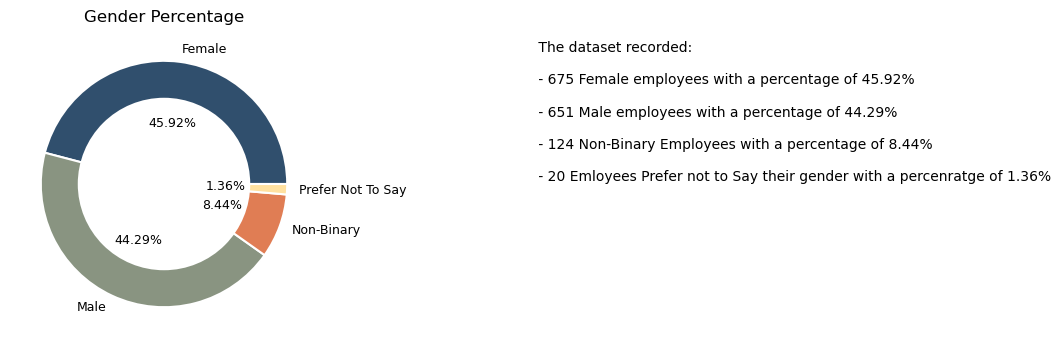

In [451]:
# Visualizing Gender Classification:
gender= gender_classification.Gender.tolist()

text = ''' The dataset recorded:\n\n - 675 Female employees with a percentage of 45.92%\n
 - 651 Male employees with a percentage of 44.29%\n
 - 124 Non-Binary Employees with a percentage of 8.44%\n
 - 20 Emloyees Prefer not to Say their gender with a percenratge of 1.36%'''

plt.subplots(figsize = (4,4))
plt.pie(gender_classification['# Employees'], labels=gender,radius=1, colors= ['#304f6d','#899481','#e07d54', '#ffe1a0'], 
        autopct='%1.2f%%',labeldistance=1.1,pctdistance=.5,textprops={'fontsize': 9}, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Gender Percentage')
plt.text(3,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [452]:
# Distribution of employees among Age Stages:
age_stages=employee_details.groupby('Age_Stages').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('# Employees',ascending=False)
age_stages.style.hide()

Age_Stages,# Employees
Youth,650
Young_Adult,467
Adult,263
Mature_Adult,90


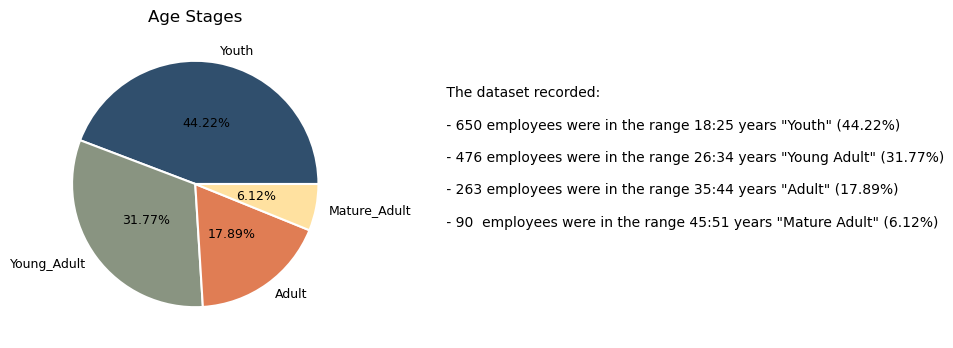

In [453]:
# Visualization of the distribution of employees among Age Stages:
stages= age_stages.reset_index().Age_Stages.tolist()
colors = ['#304f6d','#899481','#e07d54', '#ffe1a0','#e2f3fd','#e6e1dd','#bdcac5']

text = ''' The dataset recorded:\n 
 - 650 employees were in the range 18:25 years "Youth" (44.22%)\n
 - 476 employees were in the range 26:34 years "Young Adult" (31.77%)\n
 - 263 employees were in the range 35:44 years "Adult" (17.89%)\n
 - 90  employees were in the range 45:51 years "Mature Adult" (6.12%)\n'''

plt.subplots(figsize = (4,4))
plt.pie(age_stages['# Employees'], labels=stages,radius=1, colors= ['#304f6d','#899481','#e07d54', '#ffe1a0'], 
        autopct='%1.2f%%',labeldistance=1.1,pctdistance=.5,textprops={'fontsize': 9}, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
plt.title('Age Stages')
plt.text(2,-.5,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [454]:
# Race Classification:
race_classification=employee_details.groupby('Race').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('# Employees',ascending=False)
race_classification.style.hide()

Race,# Employees
White,860
Black or African American,207
Mixed or multiple ethnic groups,198
Asian or Asian American,113
American Indian or Alaska Native,50
Native Hawaiian,26
Other,16


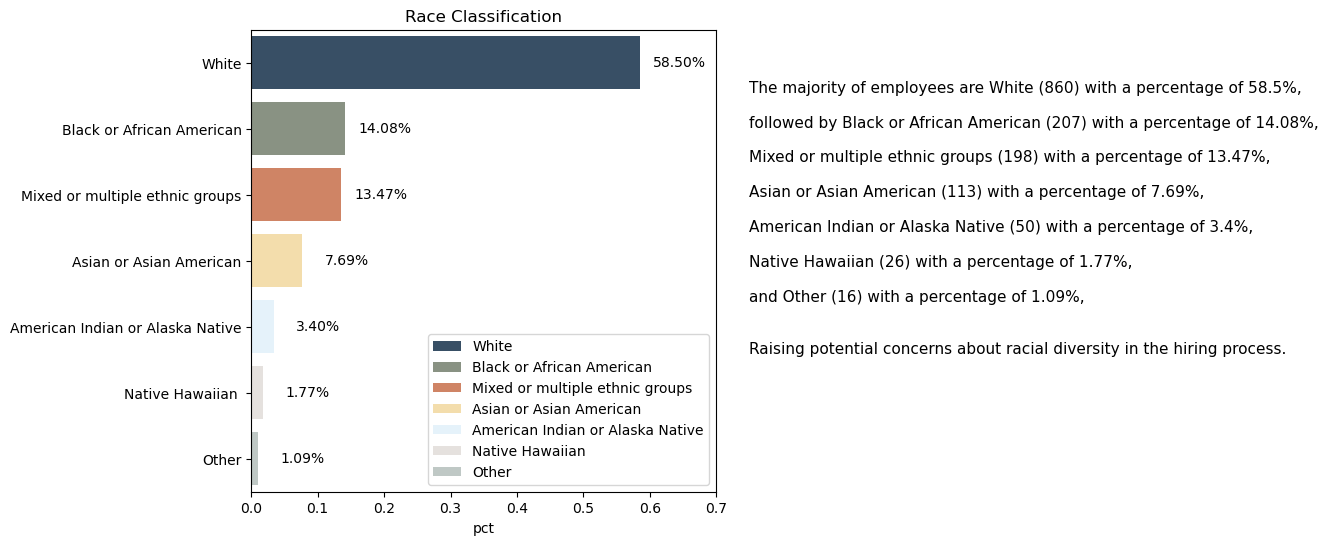

In [455]:
# Visualization of Race Classification:
race= race_classification.reset_index().Race.tolist()
race_classification['pct']= race_classification['# Employees']/race_classification['# Employees'].sum()


note = '''
The majority of employees are White (860) with a percentage of 58.5%,\n 
followed by Black or African American (207) with a percentage of 14.08%, \n
Mixed or multiple ethnic groups (198) with a percentage of 13.47%, \n
Asian or Asian American (113) with a percentage of 7.69%,\n
American Indian or Alaska Native (50) with a percentage of 3.4%,\n
Native Hawaiian (26) with a percentage of 1.77%, \n
and Other (16) with a percentage of 1.09%, \n\n
Raising potential concerns about racial diversity in the hiring process.'''

plt.subplots(figsize = (6,6))
sns.barplot(x=race_classification.pct,y= race ,palette= colors, label= race)

for i, v in enumerate(race_classification.pct):
  plt.text(v+.1,i, f"{v:.2%}", ha='right', va='center',fontsize=10)

plt.xticks(np.arange(0,.8,.1),fontsize = 10)
plt.yticks(fontsize = 10, rotation = 0)
plt.title('Race Classification', fontsize =12)
plt.legend(ncol=1,fontsize = 10)
plt.text(.75,0,note,ha='left',va='top',fontsize = 11, weight = 'normal')
plt.show();

In [456]:
# Marital status Classification:
marital_status=employee_details.groupby('Marital_Status').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('# Employees',ascending=False)
marital_status.style.hide()

Marital_Status,# Employees
Married,624
Single,549
Divorced,297


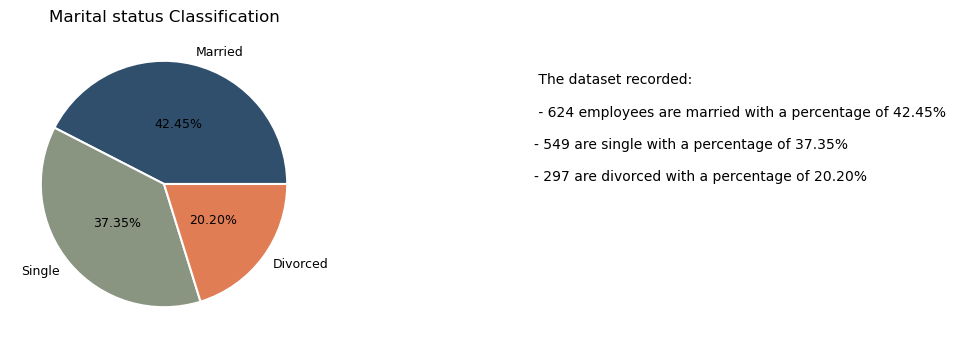

In [457]:
# Visualization of Marital Status:
status= marital_status.reset_index().Marital_Status.tolist()

text = ''' The dataset recorded:\n\n - 624 employees are married with a percentage of 42.45%\n  
- 549 are single with a percentage of 37.35%\n 
- 297 are divorced with a percentage of 20.20%'''

plt.subplots(figsize = (4,4))
plt.pie(marital_status['# Employees'], labels=status,radius=1, colors= colors, 
        autopct='%1.2f%%',labeldistance=1.1,pctdistance=.5,textprops={'fontsize': 9}, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
plt.title('Marital status Classification')
plt.text(3,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [458]:
# Eduaction Level Classification
edu_dict = {'No Formal Qualifications': 0, 'High School': 1, 'Bachelors': 2, 'Masters':3,'Doctorate':4} 
edu_level=employee_details.groupby('Edu_Level').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('Edu_Level',key=lambda x: x.map(edu_dict))
edu_level.style.hide()

Edu_Level,# Employees
No Formal Qualifications,170
High School,282
Bachelors,572
Masters,398
Doctorate,48


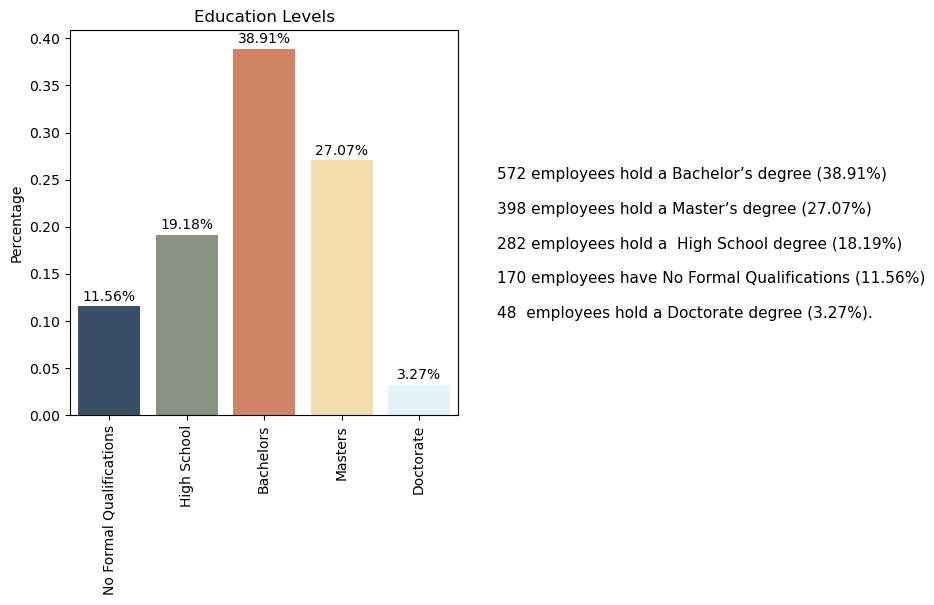

In [459]:
# Visualization of Education Level:
level= edu_level.reset_index().Edu_Level.tolist()
edu_level['pct']=edu_level['# Employees']/edu_level['# Employees'].sum()

note = '''
572 employees hold a Bachelor’s degree (38.91%)\n 
398 employees hold a Master’s degree (27.07%)\n 
282 employees hold a  High School degree (18.19%)\n
170 employees have No Formal Qualifications (11.56%)\n 
48  employees hold a Doctorate degree (3.27%).'''

plt.subplots(figsize = (5,5))
sns.barplot(x=level,y= edu_level['pct'] ,palette= colors, label= level)

for i, v in enumerate(edu_level['pct']):
  plt.text(i,v+.01, f"{v:.2%}", ha='center', va='center',fontsize=10)

plt.xticks(fontsize = 10, rotation =90)
plt.yticks(np.arange(0,.45,.05),fontsize = 10)
plt.ylabel('Percentage')
plt.title('Education Levels', fontsize =12)
plt.text(5,.1,note,ha='left',va='bottom',fontsize = 11, weight = 'normal')
plt.show();

In [460]:
# Major Distribution:
edu_field=employee_details.groupby('Major').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('# Employees',ascending=False)
edu_field.style.hide()

Major,# Employees
Computer Science,440
Information Systems,363
Marketing,325
Economics,101
Business Studies,94
Other,82
Technical Degree,38
Human Resources,27


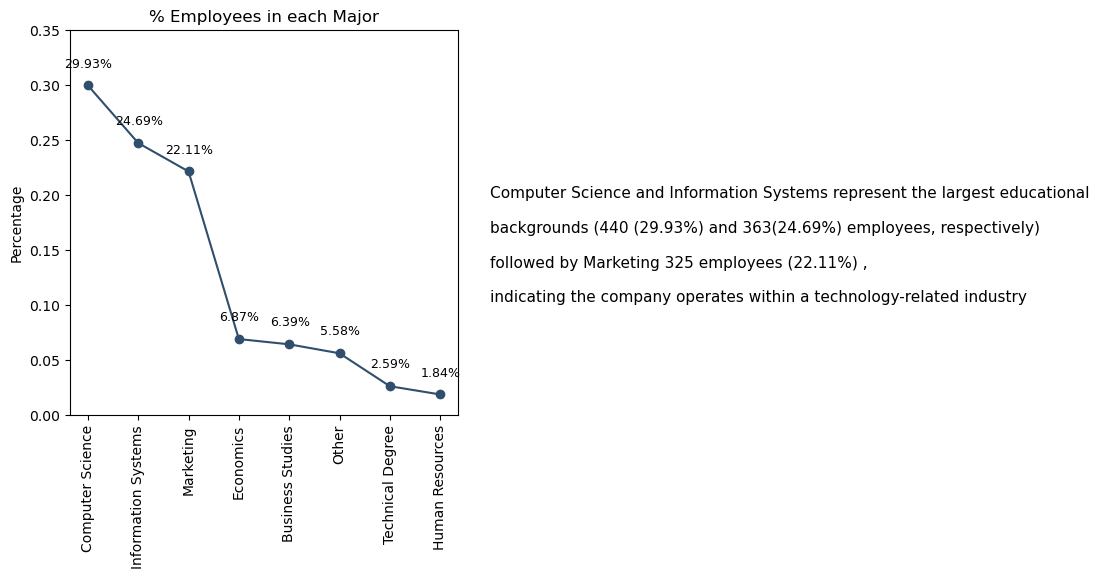

In [461]:
# Visualization of Major Among Employees:
field= edu_field.reset_index().Major.tolist()
edu_field['pct']=edu_field['# Employees']/edu_field['# Employees'].sum()

note = '''
Computer Science and Information Systems represent the largest educational\n 
backgrounds (440 (29.93%) and 363(24.69%) employees, respectively)\n
followed by Marketing 325 employees (22.11%) ,\n
indicating the company operates within a technology-related industry'''

plt.subplots(figsize = (5,5))
plt.plot(field,edu_field['pct'] ,color= '#304f6d',marker='o')

for i, v in enumerate(edu_field['pct']):
  plt.text(i+.01,v+.02, f"{v:.2%}", ha='center', va='center',fontsize=9)

plt.xticks(fontsize = 10, rotation =90)
plt.yticks(np.arange(0,.4,.05),fontsize = 10)
plt.ylabel('Percentage')
plt.title('% Employees in each Major', fontsize =12)
plt.text(8,.1,note,ha='left',va='bottom',fontsize = 11, weight = 'normal')
plt.show();

In [462]:
# Distribution of Employees among States:
state=employee_details.groupby('State').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('# Employees',ascending=False)
state.style.hide()

State,# Employees
CA,875
NY,419
IL,176


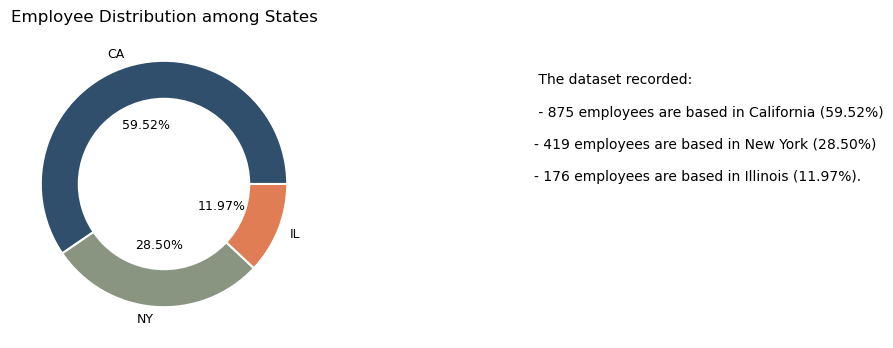

In [463]:
# Visualization of Employee Distribution among States:
location= state.reset_index().State.tolist()

text = ''' The dataset recorded:\n\n - 875 employees are based in California (59.52%)\n 
- 419 employees are based in New York (28.50%) \n
- 176 employees are based in Illinois (11.97%).'''

plt.subplots(figsize = (4,4))
plt.pie(state['# Employees'], labels=location,radius=1, colors= colors, 
        autopct='%1.2f%%',labeldistance=1.1,pctdistance=.5,textprops={'fontsize': 9}, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Employee Distribution among States')
plt.text(3,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [464]:
# Distribution of Employees according to the Distance Level from Home to Work:
distance_dict = {'Short': 0, 'Moderate': 1, 'Long': 2, 'Very_Long':3} 
distance = employee_details.groupby('Distance_Level').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('Distance_Level',key=lambda x: x.map(distance_dict))
distance.style.hide()

Distance_Level,# Employees
Short,396
Moderate,349
Long,362
Very_Long,363


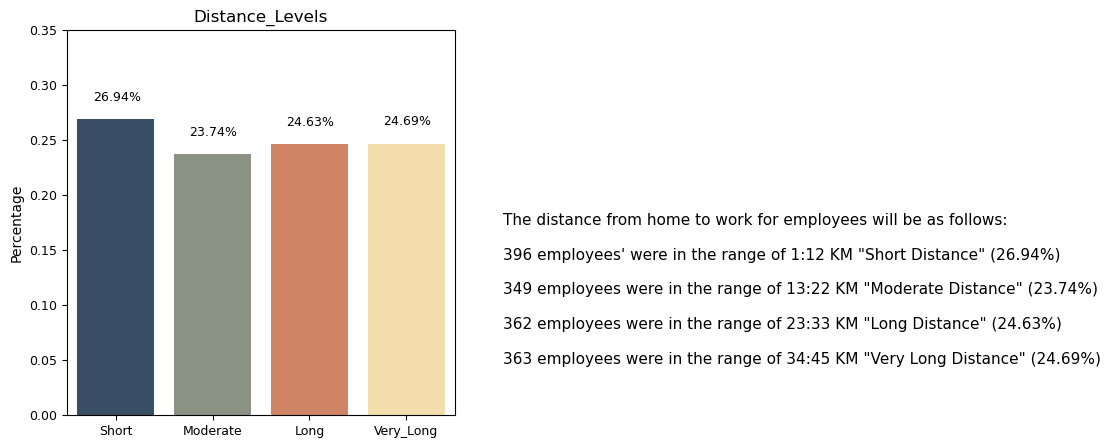

In [465]:
# Visualization of distance Level:
distance_level = distance.Distance_Level.tolist()
distance['pct']= distance['# Employees']/distance['# Employees'].sum()

note = '''
The distance from home to work for employees will be as follows:\n
396 employees' were in the range of 1:12 KM "Short Distance" (26.94%)\n
349 employees were in the range of 13:22 KM "Moderate Distance" (23.74%)\n
362 employees were in the range of 23:33 KM "Long Distance" (24.63%)\n
363 employees were in the range of 34:45 KM "Very Long Distance" (24.69%)\n'''

plt.subplots(figsize = (5,5))
sns.barplot(x=distance_level,y=distance['pct'] ,palette= colors)

for i, v in enumerate(distance['pct']):
  plt.text(i+.01,v+.02, f"{v:.2%}", ha='center', va='center',fontsize=9)

plt.xticks(fontsize = 9, rotation =0)
plt.yticks(np.arange(0,.4,.05),fontsize = 9)
plt.ylabel('Percentage')
plt.title('Distance_Levels', fontsize =12)
plt.text(4,.2,note,ha='left',va='top',fontsize = 11, weight = 'normal')
plt.show();

In [466]:
# 2- Work Profile:
work_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Emp_ID             1470 non-null   object 
 1   Department         1470 non-null   object 
 2   Position           1470 non-null   object 
 3   Salary             1470 non-null   float64
 4   Salary_Level       1470 non-null   object 
 5   Hire_Date          1470 non-null   object 
 6   Hiring_Year        1470 non-null   int64  
 7   Tenure             1470 non-null   int64  
 8   Role_Tenure        1470 non-null   int64  
 9   Promotion_Gap      1470 non-null   int64  
 10  Manager_Tenure     1470 non-null   int64  
 11  Overtime           1470 non-null   object 
 12  Business_Travel    1470 non-null   object 
 13  Equity_Grant       1470 non-null   int64  
 14  Number_of_Ratings  1470 non-null   int64  
 15  Evaluation_Status  1470 non-null   object 
 16  Turnover           1470 

In [467]:
# Employee Distribution across Departments:
dep = work_profile.groupby('Department').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('# Employees',ascending=False)
dep.style.hide()

Department,# Employees
Technology,960
Sales,447
Human Resources,63


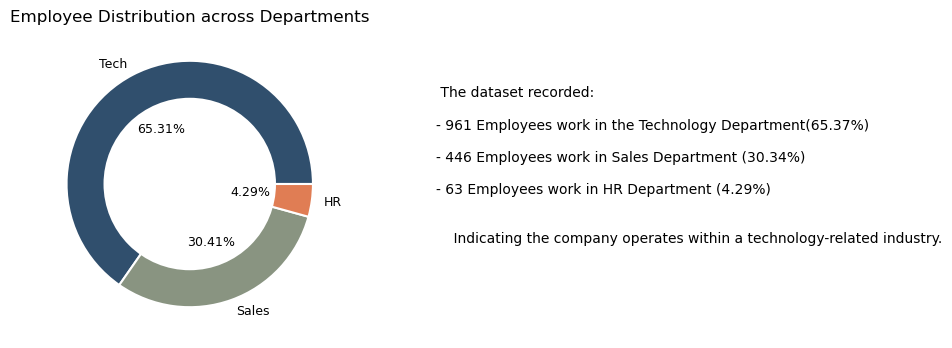

In [468]:
# Visualization of Employee Distribution across Departments:
text = ''' The dataset recorded:\n
- 961 Employees work in the Technology Department(65.37%)\n
- 446 Employees work in Sales Department (30.34%) \n
- 63 Employees work in HR Department (4.29%)\n\n
    Indicating the company operates within a technology-related industry.'''

plt.subplots(figsize = (4,4))
plt.pie(dep['# Employees'], labels=['Tech','Sales','HR'],radius=1, colors= colors, 
        autopct='%1.2f%%',labeldistance=1.1,pctdistance=.5,textprops={'fontsize': 9}, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Employee Distribution across Departments')
plt.text(2,-.5,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [469]:
# Employee Distribution across Job Roles:
role = work_profile.groupby(['Department','Position']).Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values(['Department','# Employees'],ascending=False)
role.style.hide()

Department,Position,# Employees
Technology,Software Engineer,294
Technology,Data Scientist,261
Technology,Machine Learning Engineer,146
Technology,Senior Software Engineer,132
Technology,Engineering Manager,75
Technology,Analytics Manager,52
Sales,Sales Executive,327
Sales,Sales Representative,83
Sales,Manager,37
Human Resources,HR Executive,28


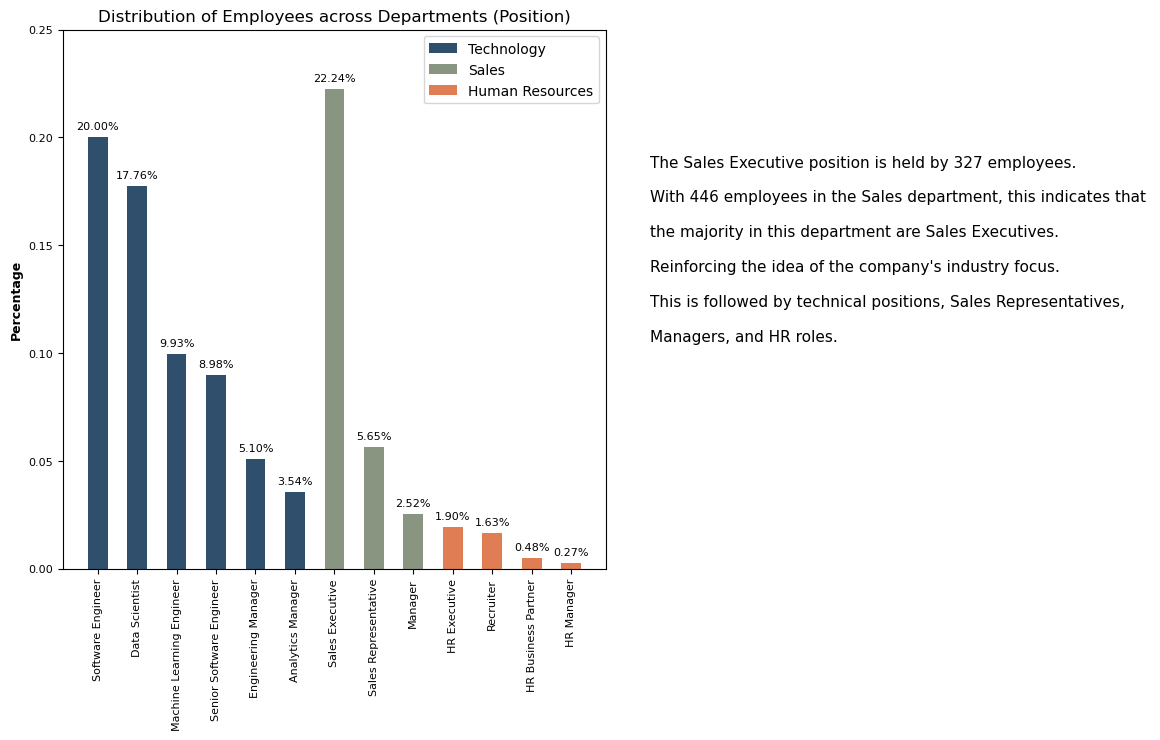

In [470]:
# Employee Distribution across Job Roles:
role['pct']= role['# Employees']/role['# Employees'].sum()

tech=role.query('Department == "Technology"')
sales=role.query('Department == "Sales"')
hr=role.query('Department == "Human Resources"')

note = '''
The Sales Executive position is held by 327 employees.\n  
With 446 employees in the Sales department, this indicates that \n
the majority in this department are Sales Executives.\n
Reinforcing the idea of the company's industry focus.\n 
This is followed by technical positions, Sales Representatives, \n
Managers, and HR roles.'''

plt.subplots(figsize = (7,7))
plt.bar(tech.Position.tolist(),tech['pct'], label = 'Technology',width=0.5, color = '#304f6d')
plt.bar(sales.Position.tolist(),sales['pct'], label = 'Sales',width=0.5, color='#899481')
plt.bar(hr.Position.tolist(),hr['pct'], label = 'Human Resources',width=0.5,color ='#e07d54')
for i, v in enumerate(role['pct']):
  plt.text(i,v+.005, f"{v:.2%}", ha='center', va='center',fontsize=8)

plt.xticks(fontsize = 8, rotation =90)
plt.yticks(np.arange(0,.3,.05),fontsize =8)
plt.ylabel('Percentage', fontsize=9, weight='bold')
plt.title('Distribution of Employees across Departments (Position)', fontsize =12)
plt.legend()
plt.text(14,.2,note,ha='left',va='top',fontsize = 11, weight = 'normal')

plt.show();

In [471]:
# Distribution of employees according to teir Salary Levels:
salary_dict = {'Low': 0, 'Medium': 1, 'High': 2, 'Very_High':3,'Extra_High':4} 
salary_level = work_profile.groupby(['Salary_Level']).Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values(['Salary_Level'],key=lambda x: x.map(salary_dict))
salary_level.style.hide()

Salary_Level,# Employees
Low,810
Medium,292
High,118
Very_High,126
Extra_High,124


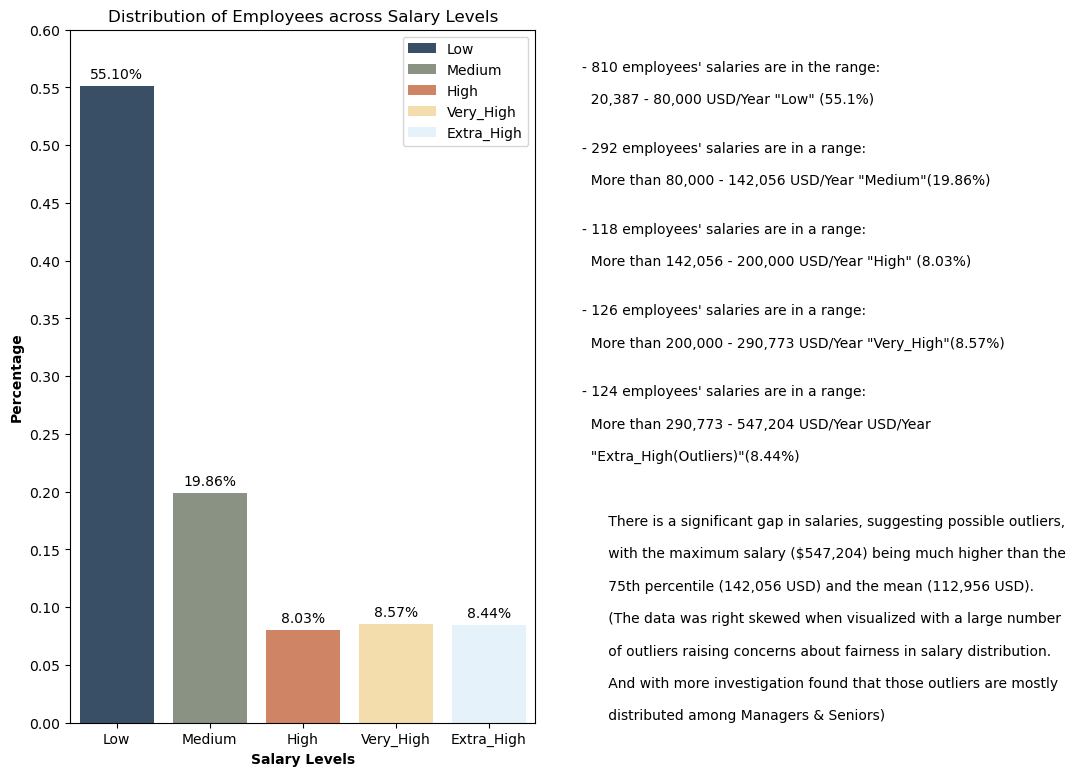

In [472]:
# Visualization of the Distribution of employees according to teir Salary Levels:
salary_level['pct']=salary_level['# Employees']/salary_level['# Employees'].sum()
s_level=salary_level.Salary_Level.tolist()
note = '''
- 810 employees' salaries are in the range:\n 
  20,387 - 80,000 USD/Year "Low" (55.1%)\n\n 
- 292 employees' salaries are in a range: \n
  More than 80,000 - 142,056 USD/Year "Medium"(19.86%)\n \n
- 118 employees' salaries are in a range: \n
  More than 142,056 - 200,000 USD/Year "High" (8.03%)\n\n
- 126 employees' salaries are in a range: \n
  More than 200,000 - 290,773 USD/Year "Very_High"(8.57%)\n \n
- 124 employees' salaries are in a range: \n
  More than 290,773 - 547,204 USD/Year USD/Year \n 
  "Extra_High(Outliers)"(8.44%)\n\n\n
      There is a significant gap in salaries, suggesting possible outliers, \n
      with the maximum salary ($547,204) being much higher than the \n
      75th percentile (142,056 USD) and the mean (112,956 USD). \n
      (The data was right skewed when visualized with a large number\n
      of outliers raising concerns about fairness in salary distribution.\n 
      And with more investigation found that those outliers are mostly \n
      distributed among Managers & Seniors)'''

plt.subplots(figsize = (6,9))
sns.barplot(x=s_level,y= salary_level['pct'] ,palette= colors, label= s_level)

for i, v in enumerate(salary_level['pct']):
  plt.text(i,v+.01, f"{v:.2%}", ha='center', va='center',fontsize=10)

plt.xticks(fontsize = 10, rotation =0)
plt.xlabel('Salary Levels', weight='bold')
plt.yticks(np.arange(0,.65,.05),fontsize = 10)
plt.ylabel('Percentage',weight='bold')
plt.title('Distribution of Employees across Salary Levels', fontsize =12)
plt.legend()
plt.text(5,0,note,ha='left',va='bottom',fontsize = 10, weight = 'normal')
plt.show();

In [473]:
# Distribution of Employees According to their Hiring Year:
hire_year = work_profile.groupby('Hiring_Year').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values(['Hiring_Year'])
hire_year.style.hide()

Hiring_Year,# Employees
2012,151
2013,136
2014,136
2015,127
2016,114
2017,106
2018,136
2019,145
2020,127
2021,137


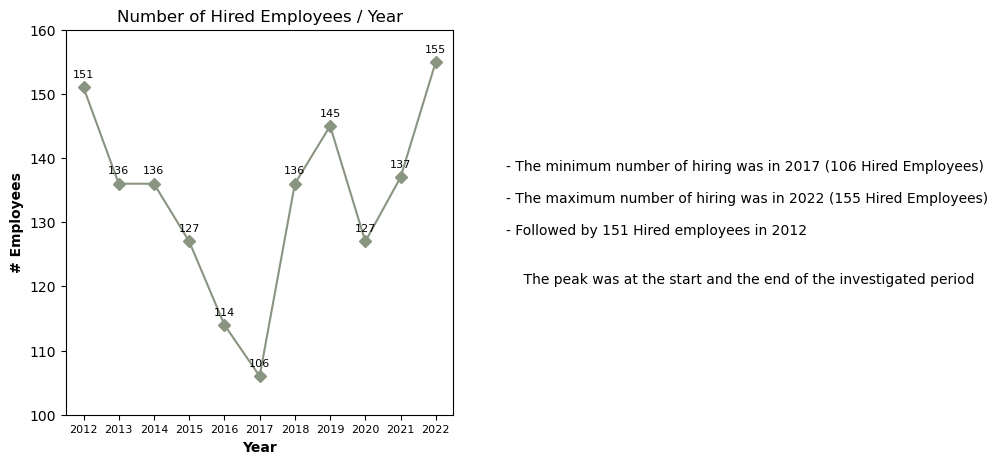

In [474]:
# Visualization of the Distribution of Employees According to their Hiring Year:
hire=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']

note = '''
- The minimum number of hiring was in 2017 (106 Hired Employees)\n
- The maximum number of hiring was in 2022 (155 Hired Employees)\n
- Followed by 151 Hired employees in 2012\n\n 
    The peak was at the start and the end of the investigated period'''

plt.subplots(figsize = (5,5))
plt.plot(hire,hire_year['# Employees'],marker="D", color='#899481')

for i, v in enumerate(hire_year['# Employees']):
  plt.text(i,v+2, f"{v:.0f}", ha='center', va='center',fontsize=8)
plt.xticks(fontsize = 8, rotation =0)
plt.xlabel('Year', weight='bold')
plt.yticks(np.arange(100,170,10),fontsize = 10)
plt.ylabel('# Employees',weight='bold')
plt.title('Number of Hired Employees / Year', fontsize =12)

plt.text(12,120,note,ha='left',va='bottom',fontsize = 10, weight = 'normal')
plt.show();

In [475]:
work_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Emp_ID             1470 non-null   object 
 1   Department         1470 non-null   object 
 2   Position           1470 non-null   object 
 3   Salary             1470 non-null   float64
 4   Salary_Level       1470 non-null   object 
 5   Hire_Date          1470 non-null   object 
 6   Hiring_Year        1470 non-null   int64  
 7   Tenure             1470 non-null   int64  
 8   Role_Tenure        1470 non-null   int64  
 9   Promotion_Gap      1470 non-null   int64  
 10  Manager_Tenure     1470 non-null   int64  
 11  Overtime           1470 non-null   object 
 12  Business_Travel    1470 non-null   object 
 13  Equity_Grant       1470 non-null   int64  
 14  Number_of_Ratings  1470 non-null   int64  
 15  Evaluation_Status  1470 non-null   object 
 16  Turnover           1470 

In [476]:
# Distribution of Employees according to their working years at the company:
tenure = work_profile.groupby('Tenure').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('Tenure')
tenure.style.hide()

Tenure,# Employees
0,190
1,177
2,124
3,148
4,129
5,115
6,101
7,121
8,119
9,118


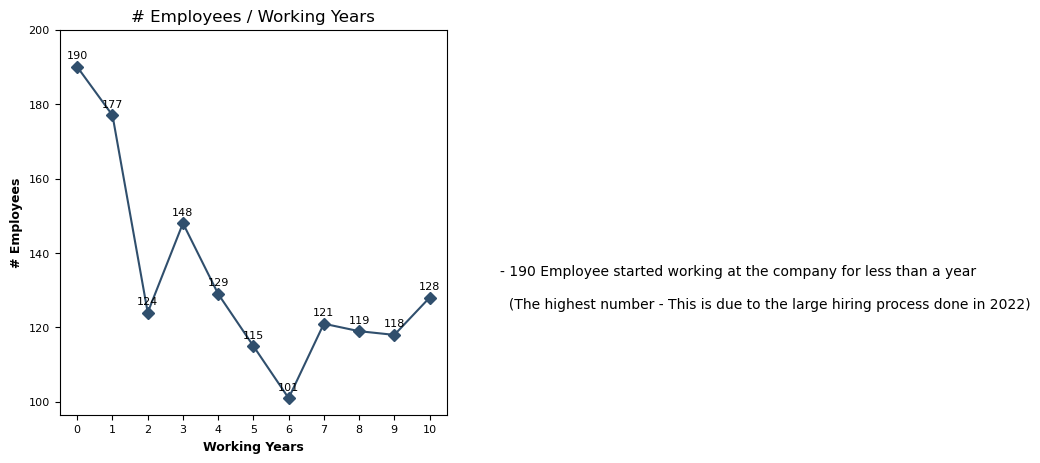

In [477]:
# Visualization of the Distribution of Employees according to their working years at the company:
period=['0','1','2','3','4','5','6','7','8','9','10']

note = '''
- 190 Employee started working at the company for less than a year \n
  (The highest number - This is due to the large hiring process done in 2022)
'''

plt.subplots(figsize = (5,5))
plt.plot(period,tenure['# Employees'],marker="D", color='#304f6d')

for i, v in enumerate(tenure['# Employees']):
  plt.text(i,v+3, f"{v:.0f}", ha='center', va='center',fontsize=8)
plt.xticks(fontsize = 8, rotation =0)
plt.xlabel('Working Years', weight='bold',fontsize = 9)
plt.yticks(np.arange(100,220,20),fontsize = 8)
plt.ylabel('# Employees',weight='bold',fontsize = 9)
plt.title('# Employees / Working Years', fontsize =12)

plt.text(12,120,note,ha='left',va='bottom',fontsize = 10, weight = 'normal')
plt.show();

In [478]:
# Distribution of Employees according to their spending years in most recent role:
role_tenure = work_profile.groupby('Role_Tenure').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('Role_Tenure')
role_tenure.style.hide()

Role_Tenure,# Employees
0,499
1,256
2,174
3,146
4,114
5,83
6,63
7,51
8,46
9,25


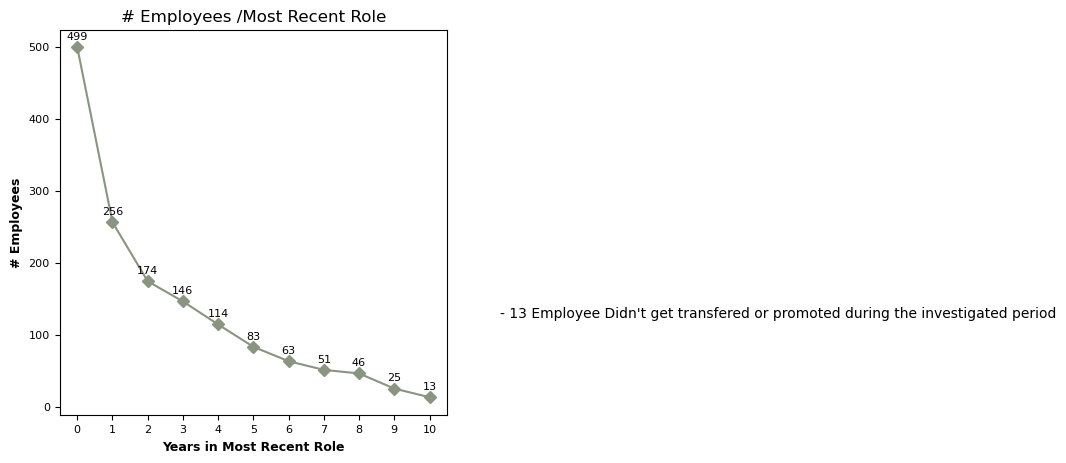

In [479]:
# Visualization of the Distribution of Employees according to their spending years in most recent role:
note = '''
- 13 Employee Didn't get transfered or promoted during the investigated period'''

plt.subplots(figsize = (5,5))

plt.plot(period,role_tenure['# Employees'],marker="D", color='#899481')

for i, v in enumerate(role_tenure['# Employees']):
  plt.text(i,v+15, f"{v:.0f}", ha='center', va='center',fontsize=8)
plt.xticks(fontsize = 8, rotation =0)
plt.xlabel('Years in Most Recent Role', weight='bold',fontsize = 9)
plt.yticks(fontsize = 8)
plt.ylabel('# Employees',weight='bold',fontsize = 9)
plt.title('# Employees /Most Recent Role', fontsize =12)

plt.text(12,120,note,ha='left',va='bottom',fontsize = 10, weight = 'normal')
plt.show();

In [480]:
# Distribution of Employees according to their Promotion Gap:
promotion_gap = work_profile.groupby('Promotion_Gap').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('Promotion_Gap')
promotion_gap.style.hide()


Promotion_Gap,# Employees
0,301
1,211
2,150
3,166
4,147
5,116
6,108
7,88
8,68
9,77


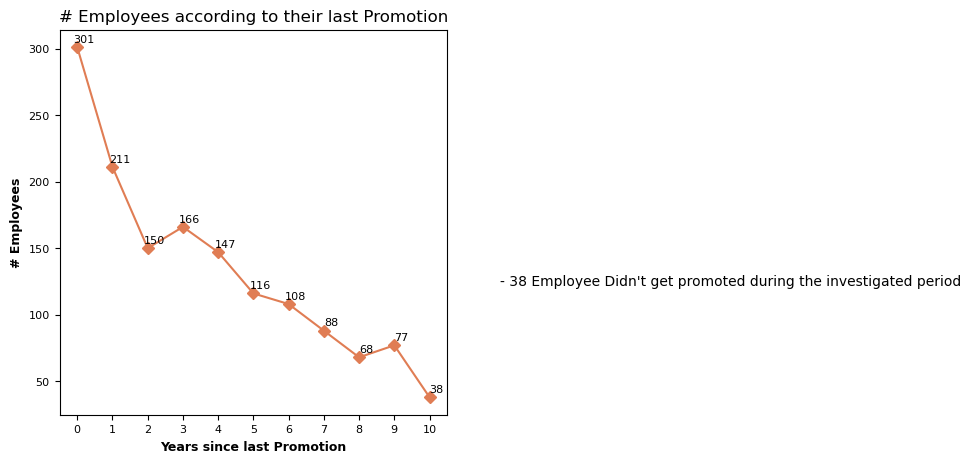

In [481]:
# Visualization of the Distribution of Employees according to their Promotion Gap:
note = '''
- 38 Employee Didn't get promoted during the investigated period'''

plt.subplots(figsize = (5,5))
plt.plot(period,promotion_gap['# Employees'],marker="D", color='#e07d54')

for i, v in enumerate(promotion_gap['# Employees']):
  plt.text(i+.2,v+6, f"{v:.0f}", ha='center', va='center',fontsize=8)
plt.xticks(fontsize = 8, rotation =0)
plt.xlabel('Years since last Promotion', weight='bold',fontsize = 9)
plt.yticks(fontsize = 8)
plt.ylabel('# Employees',weight='bold',fontsize = 9)
plt.title('# Employees according to their last Promotion', fontsize =12)

plt.text(12,120,note,ha='left',va='bottom',fontsize = 10, weight = 'normal')
plt.show();

In [482]:
# Distribution of Employees according to their total years working under their current manager:
mgr_tenure=work_profile.groupby('Manager_Tenure').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('Manager_Tenure')
mgr_tenure.style.hide()

Manager_Tenure,# Employees
0,479
1,292
2,191
3,139
4,103
5,73
6,63
7,49
8,40
9,27


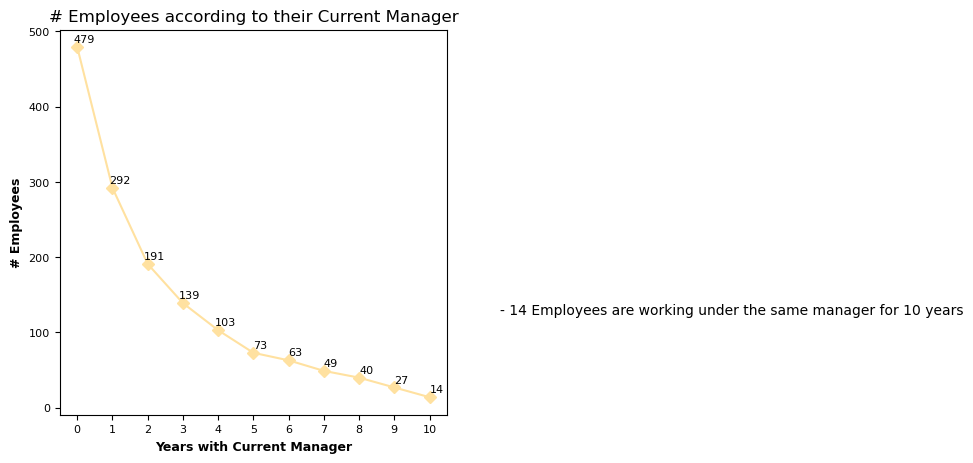

In [483]:
# Visualization of the Distribution of Employees according to their total years working under their current manager:
period=['0','1','2','3','4','5','6','7','8','9','10']

note = '''
- 14 Employees are working under the same manager for 10 years'''

plt.subplots(figsize = (5,5))

plt.plot(period,mgr_tenure['# Employees'],marker="D", color='#ffe1a0')
for i, v in enumerate(mgr_tenure['# Employees']):
  plt.text(i+.2,v+10, f"{v:.0f}", ha='center', va='center',fontsize=8)
plt.xticks(fontsize = 8, rotation =0)
plt.xlabel('Years with Current Manager', weight='bold',fontsize = 9)
plt.yticks(fontsize = 8)
plt.ylabel('# Employees',weight='bold',fontsize = 9)
plt.title('# Employees according to their Current Manager', fontsize =12)

plt.text(12,120,note,ha='left',va='bottom',fontsize = 10, weight = 'normal')
plt.show();

In [484]:
work_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Emp_ID             1470 non-null   object 
 1   Department         1470 non-null   object 
 2   Position           1470 non-null   object 
 3   Salary             1470 non-null   float64
 4   Salary_Level       1470 non-null   object 
 5   Hire_Date          1470 non-null   object 
 6   Hiring_Year        1470 non-null   int64  
 7   Tenure             1470 non-null   int64  
 8   Role_Tenure        1470 non-null   int64  
 9   Promotion_Gap      1470 non-null   int64  
 10  Manager_Tenure     1470 non-null   int64  
 11  Overtime           1470 non-null   object 
 12  Business_Travel    1470 non-null   object 
 13  Equity_Grant       1470 non-null   int64  
 14  Number_of_Ratings  1470 non-null   int64  
 15  Evaluation_Status  1470 non-null   object 
 16  Turnover           1470 

In [485]:
# Employee Distribution According to Overtime Classification:
overtime = work_profile.groupby('Overtime').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('# Employees',ascending=False)
overtime.style.hide()

Overtime,# Employees
No,1054
Yes,416


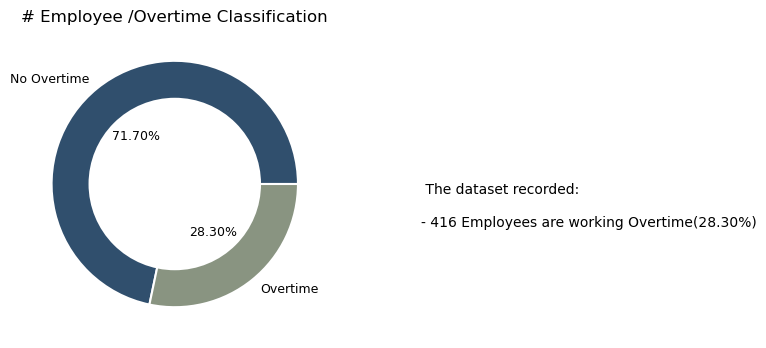

In [486]:
# Visualization of Employee Distribution According to Overtime Classification:
text=''' The dataset recorded:\n
- 416 Employees are working Overtime(28.30%)
'''

plt.subplots(figsize = (4,4))
plt.pie(overtime['# Employees'], labels=['No Overtime','Overtime'],radius=1, colors= colors, 
        autopct='%1.2f%%',labeldistance=1.1,pctdistance=.5,textprops={'fontsize': 9}, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('# Employee /Overtime Classification')
plt.text(2,-.5,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [487]:
# Employee Distribution According to Business Travel Classification:
business_travel = work_profile.groupby('Business_Travel').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('# Employees',ascending=False)
business_travel.style.hide()

Business_Travel,# Employees
Some Travel,1043
Frequent Traveler,277
No Travel,150


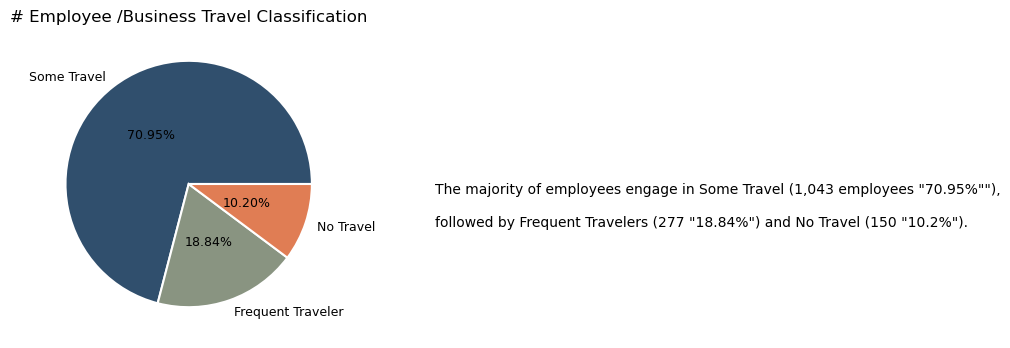

In [488]:
 text=''' 
The majority of employees engage in Some Travel (1,043 employees "70.95%""),\n 
followed by Frequent Travelers (277 "18.84%") and No Travel (150 "10.2%").
'''

plt.subplots(figsize = (4,4))
plt.pie(business_travel['# Employees'], labels=business_travel.Business_Travel,radius=1, colors= colors, 
        autopct='%1.2f%%',labeldistance=1.1,pctdistance=.5,textprops={'fontsize': 9}, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )

plt.title('# Employee /Business Travel Classification')
plt.text(2,-.5,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [489]:
# Employee Distribution across Equity Grant Classification:
equity = work_profile.groupby('Equity_Grant').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('# Employees',ascending=False)
equity.style.hide()

Equity_Grant,# Employees
0,631
1,596
2,158
3,85


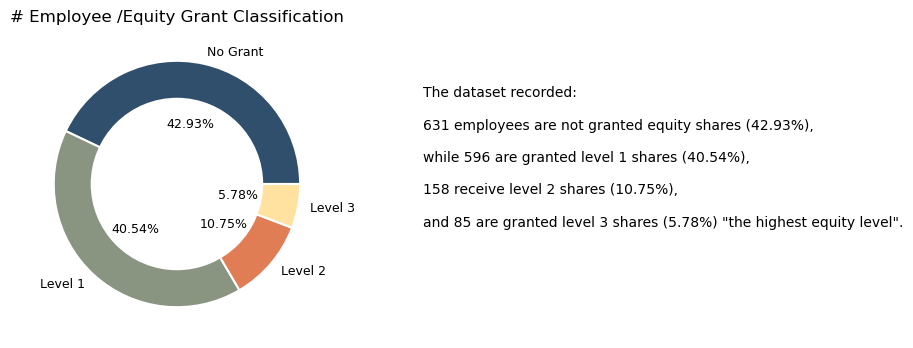

In [490]:
# Visualization of Employee Distribution across Equity Grant Classification:
text='''The dataset recorded:\n
631 employees are not granted equity shares (42.93%),\n 
while 596 are granted level 1 shares (40.54%),\n 
158 receive level 2 shares (10.75%), \n
and 85 are granted level 3 shares (5.78%) "the highest equity level".
'''

plt.subplots(figsize = (4,4))
plt.pie(equity['# Employees'], labels=['No Grant','Level 1','Level 2', 'Level 3'],radius=1, colors= colors, 
        autopct='%1.2f%%',labeldistance=1.1,pctdistance=.5,textprops={'fontsize': 9}, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('# Employee /Equity Grant Classification')
plt.text(2,-.5,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [491]:
# Employee Distribution across Turnover Classification:
turnover = work_profile.groupby('Turnover').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('# Employees',ascending=False)
turnover.style.hide()

Turnover,# Employees
No,1233
Yes,237


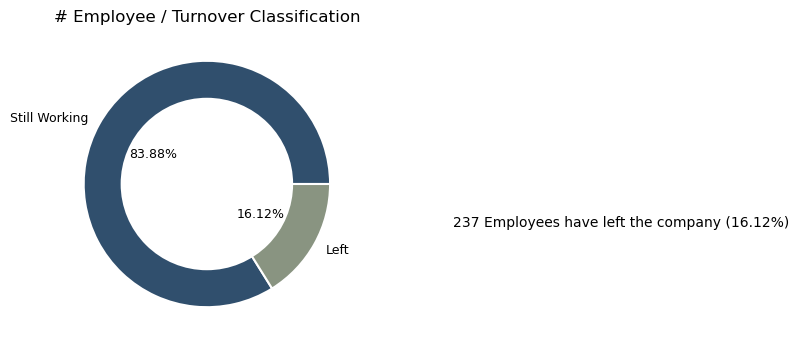

In [492]:
# Visualization of Employee Distribution across Turnover Classification:
text='''237 Employees have left the company (16.12%)
'''

plt.subplots(figsize = (4,4))
plt.pie(turnover['# Employees'], labels=['Still Working','Left'],radius=1, colors= colors, 
        autopct='%1.2f%%',labeldistance=1.1,pctdistance=.5,textprops={'fontsize': 9}, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('# Employee / Turnover Classification')
plt.text(2,-.5,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [493]:
# Employee left / year:
left = work_profile.groupby('Attrition_Year').Emp_ID.nunique().reset_index().rename(columns={'Emp_ID':'# Employees'}).\
sort_values('Attrition_Year')
left.style.hide().format({'Attrition_Year':'{:.0f}'})

Attrition_Year,# Employees
2013,2
2014,10
2015,11
2016,12
2017,14
2018,21
2019,21
2020,32
2021,60
2022,54


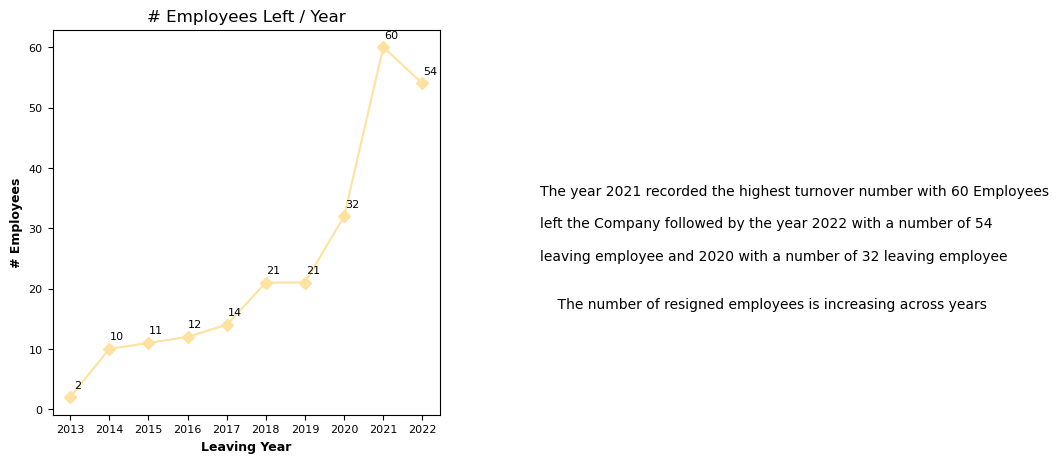

In [494]:
# Visualization of the turnover / year:
leaving_year= ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
note = '''
The year 2021 recorded the highest turnover number with 60 Employees \n
left the Company followed by the year 2022 with a number of 54 \n
leaving employee and 2020 with a number of 32 leaving employee\n\n
    The number of resigned employees is increasing across years
    '''

plt.subplots(figsize = (5,5))

plt.plot(leaving_year,left['# Employees'],marker="D", color='#ffe1a0')
for i, v in enumerate(left['# Employees']):
  plt.text(i+.2,v+2, f"{v:.0f}", ha='center', va='center',fontsize=8)
plt.xticks(fontsize = 8, rotation =0)
plt.xlabel('Leaving Year', weight='bold',fontsize = 9)
plt.yticks(fontsize = 8)
plt.ylabel('# Employees',weight='bold',fontsize = 9)
plt.title('# Employees Left / Year', fontsize =12)

plt.text(12,40,note,ha='left',va='top',fontsize = 10, weight = 'normal')
plt.show();

In [495]:
performance_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Performance_ID            6709 non-null   object
 1   Emp_ID                    6709 non-null   object
 2   Review_Date               6709 non-null   object
 3   Review_Year               6709 non-null   int64 
 4   Environ_Satis_Level       6709 non-null   object
 5   Job_Satis_Level           6709 non-null   object
 6   Relationship_Satis_Level  6709 non-null   object
 7   Work_Life_Bal             6709 non-null   object
 8   Train_Opp_Year            6709 non-null   int64 
 9   Train_Opp_Taken           6709 non-null   int64 
 10  Self_Rating               6709 non-null   object
 11  Mgr_Rating                6709 non-null   object
dtypes: int64(3), object(9)
memory usage: 629.1+ KB


In [639]:
# Training opportunities granted / year:
opp_granted_year = performance_rating.groupby('Review_Year').Train_Opp_Year.sum().reset_index().rename(columns={'Train_Opp_Year':'# Opportunities'}).\
sort_values('Review_Year')
opp_granted_year.style.hide()

Review_Year,# Opportunities
2013,310
2014,567
2015,849
2016,1044
2017,1280
2018,1429
2019,1692
2020,1937
2021,2109
2022,2288


In [641]:
# Training opportunities taken / year:
opp_taken_year = performance_rating.groupby('Review_Year').Train_Opp_Taken.sum().reset_index().rename(columns={'Train_Opp_Taken':'# Opportunities'}).\
sort_values('Review_Year')
opp_taken_year.style.hide()

Review_Year,# Opportunities
2013,142
2014,317
2015,435
2016,543
2017,633
2018,743
2019,871
2020,1019
2021,1058
2022,1064


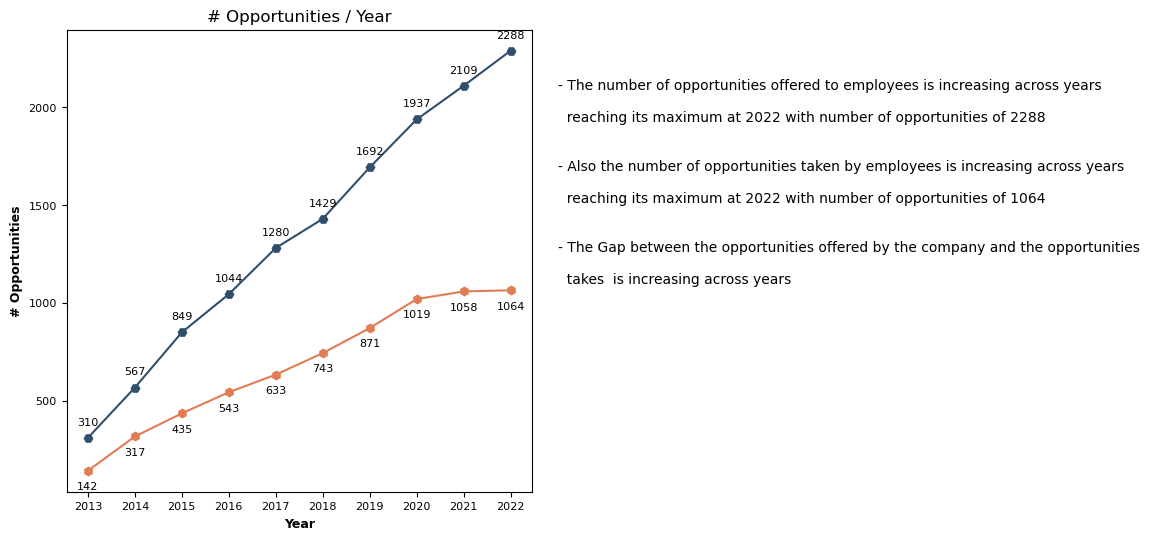

In [703]:
# Visualization of the turnover / year:
opp_year= ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
note = '''
- The number of opportunities offered to employees is increasing across years\n
  reaching its maximum at 2022 with number of opportunities of 2288\n\n
- Also the number of opportunities taken by employees is increasing across years\n
  reaching its maximum at 2022 with number of opportunities of 1064\n\n
- The Gap between the opportunities offered by the company and the opportunities\n
  takes  is increasing across years
    '''

plt.subplots(figsize = (6,6))

plt.plot(opp_year,opp_granted_year['# Opportunities'],marker="H", color='#304f6d')
plt.plot(opp_year,opp_taken_year['# Opportunities'],marker="h", color='#e07d54')
for i, v in enumerate(opp_granted_year['# Opportunities']):
  plt.text(i,v+55, f"{v:.0f}", ha='center', va='bottom',fontsize=8)
for i, v in enumerate(opp_taken_year['# Opportunities']):
  plt.text(i,v-55, f"{v:.0f}", ha='center', va='top',fontsize=8)    
plt.xticks(fontsize = 8, rotation =0)
plt.xlabel('Year', weight='bold',fontsize = 9)
plt.yticks(fontsize = 8)
plt.ylabel('# Opportunities',weight='bold',fontsize = 9)
plt.title('# Opportunities / Year', fontsize =12)

plt.text(10,1000,note,ha='left',va='bottom',fontsize = 10, weight = 'normal')
plt.show();